The dataset consists of all the basic bank details of the customers, and the
dataset has categorical and numerical variables.  It consists of the customer’s bank and processional details over the years
so we can explore more of it. 


1. ID - Represents a unique identification of an entry.
2. CUSTOMER ID - This represents the unique identification of a person.
3. MONTH - Represents the month of the year.
4. NAME - Represents the name of a person.
5. AGE - Represents the age of the person.
6. SSN - Represents the social security number of the person.
7. OCCUPATION - Represents the occupation of the person.
8. ANNUAL INCOME - Represents the yearly income of the person.
9. MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.
10. NUM BANK ACCOUNTS - This represents the number of bank accounts a person
holds.
11. NUM CREDIT CARD - This represents the number of other credit cards held by the
person.
12. INTEREST Rate - This represents the interest rate on a credit card.
13. NUM OF LOAN - Represents the number of loans taken from the bank.
14. TYPE OF LOAN - Represents the type of loan taken by the person.
15. DELAY FROM DUE DATE - Represents the average number of days delayed from the
payment date.
16. NUM OF DELAYED PAYMENT - Represents the average number of payments
delayed by a person.
17. CHANGED CREDIT LIMIT - This represents the percentage change in the credit card
limit.
18. NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.
19. CREDIT MIX - This represents the classification of the mix of credits. A credit mix refers to the multiple types of loan accounts you hold, such as credit cards, student loans, mortgages, and car loans.
20. OUTSTANDING DEBT - This represents the remaining debt to be paid(in USD).
21. CREDIT UTILIZATION RATIO - This represents the utilization ratio of credit cards.
22. CREDIT HISTORY AGE - This represents the age of the credit history of the person.
23. PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was
paid by the person.
24. TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).
25. AMOUNT INVESTED MONTHLY - Represents the monthly amount invested by the
customer(in USD)
26. PAYMENT BEHAVIOUR - Represents the payment behavior of the customer (in
USD)
27. MONTHLY BALANCE - Represents the monthly amount of the customer (in USD).

# Section A:

# Business Problem

Problem Statement:
You are working as a data scientist in a global finance company. Over the years, the
company has collected basic bank details and gathered a lot of credit-related information.
The management wants to build an intelligent system to segregate the people into credit
score brackets to reduce manual efforts.

Objective: The objective of this project is to explore the data to identify the pattern that causes
the person to have a good or bad or standard type credit score and build a machine
learning model that should be able to predict or classify the credit score type. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# Concatenating two dataframes (train and test) for preprocessing

In [2]:
df =pd.read_csv('train.csv')
df.head().T

0  \
ID                                                                   0x1602   
Customer_ID                                                       CUS_0xd40   
Month                                                               January   
Name                                                          Aaron Maashoh   
Age                                                                      23   
SSN                                                             821-00-0265   
Occupation                                                        Scientist   
Annual_Income                                                      19114.12   
Monthly_Inhand_Salary                                           1824.843333   
Num_Bank_Accounts                                                         3   
Num_Credit_Card                                                           4   
Interest_Rate                                                             3   
Num_of_Loan                                                               4   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    7   
Changed_Credit_Limit                                                  11.27   
Num_Credit_Inquiries                                               4.000000   
Credit_Mix                                                                _   
Outstanding_Debt                                                     809.98   
Credit_Utilization_Ratio                                          26.822620   
Credit_History_Age                                    22 Years and 1 Months   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                               49.574949   
Amount_invested_monthly                                   80.41529543900253   
Payment_Behaviour                           High_spent_Small_value_payments   
Monthly_Balance                                          312.49408867943663   
Credit_Score                                                           Good   

                                                                          1  \
ID                                                                   0x1603   
Customer_ID                                                       CUS_0xd40   
Month                                                              February   
Name                                                          Aaron Maashoh   
Age                                                                      23   
SSN                                                             821-00-0265   
Occupation                                                        Scientist   
Annual_Income                                                      19114.12   
Monthly_Inhand_Salary                                                   NaN   
Num_Bank_Accounts                                                         3   
Num_Credit_Card                                                           4   
Interest_Rate                                                             3   
Num_of_Loan                                                               4   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                      -1   
Num_of_Delayed_Payment                                                  NaN   
Changed_Credit_Limit                                                  11.27   
Num_Credit_Inquiries                                               4.000000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                     809.98   
Credit_Utilization_Ratio                                          31.944960   
Credit_History_Age                          

In [3]:
df_test =pd.read_csv('test.csv')
df_test.head().T

0  \
ID                                                                   0x160a   
Customer_ID                                                       CUS_0xd40   
Month                                                             September   
Name                                                          Aaron Maashoh   
Age                                                                      23   
SSN                                                             821-00-0265   
Occupation                                                        Scientist   
Annual_Income                                                      19114.12   
Monthly_Inhand_Salary                                           1824.843333   
Num_Bank_Accounts                                                         3   
Num_Credit_Card                                                           4   
Interest_Rate                                                             3   
Num_of_Loan                                                               4   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    7   
Changed_Credit_Limit                                                  11.27   
Num_Credit_Inquiries                                            2022.000000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                     809.98   
Credit_Utilization_Ratio                                          35.030402   
Credit_History_Age                                    22 Years and 9 Months   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                               49.574949   
Amount_invested_monthly                                  236.64268203272135   
Payment_Behaviour                            Low_spent_Small_value_payments   
Monthly_Balance                                          186.26670208571772   

                                                                          1  \
ID                                                                   0x160b   
Customer_ID                                                       CUS_0xd40   
Month                                                               October   
Name                                                          Aaron Maashoh   
Age                                                                      24   
SSN                                                             821-00-0265   
Occupation                                                        Scientist   
Annual_Income                                                      19114.12   
Monthly_Inhand_Salary                                           1824.843333   
Num_Bank_Accounts                                                         3   
Num_Credit_Card                                                           4   
Interest_Rate                                                             3   
Num_of_Loan                                                               4   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    9   
Changed_Credit_Limit                                                  13.27   
Num_Credit_Inquiries                                               4.000000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                     809.98   
Credit_Utilization_Ratio                                          33.053114   
Credit_History_Age                                   22 Years and 10 Months   
Payment_of_Min_Amount                       

In [4]:
df.shape

(100000, 28)

In [5]:
df_test.shape

(50000, 27)

In [6]:
df_concat = pd.concat([df, df_test], ignore_index=True )
df_concat.shape

(150000, 28)

In [7]:
df_concat_copy = df_concat.copy()

In [8]:
df_concat.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
#Datatype of following features are incorrect in the dataset.
#Name- Does not add value to the case study. (Dropped the feature)
#Month - Does not add value to the case study. (Dropped the feature)
#Age - Remove "_". Should be numeric. Age in between 0 to 100.
#Occupation- Remove "_".
#SSN - Does not add value to the case study. (Dropped the feature)
#Annual income- Remove "_". Should be numeric (float64).
#Monthly_Inhand_Salary - Replace null values with median.
#Num_Credit_Card: >10, then replace with median.
#Interest_Rate:>100, then replace with median.
#Num_of_Loan - Remove "_", >=0 and <100,  Should be numeric.
#Type_of_Loan : Drop the feature.
#Delay_from_due_date : >=0 and <100
#Num_of_Delayed_Payment- Remove "_", >=0 and <100,  Should be numeric 
#Changed_Credit_Limit - Remove "_".Replace null values with median. Should be numeric (float64).
#Num_Credit_Inquiries-  Replace null values with median.  >=0 and <100. If it is float then replace with median and convert to int64.
#Credit_Mix - Replace observations of _ with median. 
#Credit_Utilization_Ratio - No change.
#Outstanding_Debt - Remove "_". Should be numeric (float64).
#Credit_History_Age- Replace null values with median. Then, Needs to be modified and converted to numeric.
#Payment_of_Min_Amount- Replace 'NM' with median.
#Amount_invested_monthly - Remove "_" and Should be numeric (float64).
#Payment_Behaviour - Replace !@9#%8 with median. Need to find unique values and perform ordinal encoding (numeric)
#Monthly_Balance - Remove "_". Should be numeric.
#Credit_Score - No change.

In [10]:
df_concat = df_concat.drop('Month', axis=1)
df_concat = df_concat.drop('Name', axis=1)
df_concat = df_concat.drop('SSN', axis=1)
df_concat = df_concat.drop('Type_of_Loan', axis=1)

In [11]:
df_concat['Age'] = df_concat['Age'].str.strip('_')

In [12]:
df_concat.Occupation.value_counts()

_______          10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [13]:
df_concat.Occupation.replace('_______', np.NaN, inplace=True)
df_concat.Occupation.fillna(method='ffill', inplace = True)
df_concat.Occupation.isnull().sum()

0

In [14]:

df_concat['Occupation'] = df_concat['Occupation'].str.strip('_')
df_concat['Annual_Income'] = df_concat['Annual_Income'].str.strip('_')
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].str.strip('_')
df_concat['Num_of_Delayed_Payment'] = df_concat['Num_of_Delayed_Payment'].str.strip('_')
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].str.strip('_')



In [15]:
df_concat['Age'] = df_concat['Age'].str.strip('_')
df_concat['Credit_Mix'] = df_concat['Credit_Mix'].str.strip('_')
df_concat['Outstanding_Debt'] = df_concat['Outstanding_Debt'].str.strip('_')
df_concat['Amount_invested_monthly'] = df_concat['Amount_invested_monthly'].str.strip('_')
df_concat['Monthly_Balance'] = df_concat['Monthly_Balance'].str.strip('_')

In [16]:
gb1= df_concat.groupby('Customer_ID')['Monthly_Inhand_Salary'].median().to_dict()
gb1

{'CUS_0x1000': 2706.1616666666664,
 'CUS_0x1009': 4250.39,
 'CUS_0x100b': 9549.7825,
 'CUS_0x1011': 5208.8725,
 'CUS_0x1013': 7962.415000000001,
 'CUS_0x1015': 3725.585,
 'CUS_0x1018': 5014.5675,
 'CUS_0x1026': 14463.856666666668,
 'CUS_0x102d': 7256.043333333334,
 'CUS_0x102e': 4197.953333333334,
 'CUS_0x1032': 5274.245,
 'CUS_0x1037': 1086.42375,
 'CUS_0x1038': 10959.43,
 'CUS_0x103e': 8262.233333333334,
 'CUS_0x1041': 894.1758333333332,
 'CUS_0x1044': 2748.799166666666,
 'CUS_0x1048': 3680.295,
 'CUS_0x104a': 1461.4491666666663,
 'CUS_0x104e': 1688.405833333333,
 'CUS_0x104f': 992.73625,
 'CUS_0x1051': 2859.518333333333,
 'CUS_0x1056': 1196.8216666666667,
 'CUS_0x1057': 7250.096666666667,
 'CUS_0x105b': 2289.593700256465,
 'CUS_0x105c': 10596.8,
 'CUS_0x1063': 10628.896666666666,
 'CUS_0x1069': 4799.445,
 'CUS_0x106f': 11102.589999999998,
 'CUS_0x1075': 1933.468717801689,
 'CUS_0x107c': 4179.2125,
 'CUS_0x107e': 6269.9925,
 'CUS_0x1087': 3377.7608333333333,
 'CUS_0x108a': 2554.81382

In [17]:
df_concat['Monthly_Inhand_Salary']=df_concat['Monthly_Inhand_Salary'].fillna(df_concat['Customer_ID'].map(gb1))
df_concat.Monthly_Inhand_Salary.isnull().sum()

0

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

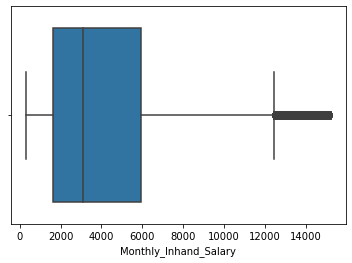

In [18]:
sns.boxplot(df_concat['Monthly_Inhand_Salary'])

In [19]:
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].astype(float)

In [20]:
gb2= df_concat.groupby('Customer_ID')['Num_of_Delayed_Payment'].median().to_dict()
gb2

{'CUS_0x1000': 25.0,
 'CUS_0x1009': 18.0,
 'CUS_0x100b': 7.0,
 'CUS_0x1011': 15.0,
 'CUS_0x1013': 9.0,
 'CUS_0x1015': 9.0,
 'CUS_0x1018': 22.0,
 'CUS_0x1026': 2.0,
 'CUS_0x102d': 5.0,
 'CUS_0x102e': 10.0,
 'CUS_0x1032': 9.0,
 'CUS_0x1037': 15.0,
 'CUS_0x1038': 13.0,
 'CUS_0x103e': 17.0,
 'CUS_0x1041': 17.0,
 'CUS_0x1044': 4.0,
 'CUS_0x1048': 8.0,
 'CUS_0x104a': 6.0,
 'CUS_0x104e': 17.0,
 'CUS_0x104f': 19.0,
 'CUS_0x1051': 11.0,
 'CUS_0x1056': 16.0,
 'CUS_0x1057': 20.0,
 'CUS_0x105b': 12.0,
 'CUS_0x105c': 6.0,
 'CUS_0x1063': 16.0,
 'CUS_0x1069': 17.0,
 'CUS_0x106f': 7.0,
 'CUS_0x1075': 11.0,
 'CUS_0x107c': 16.0,
 'CUS_0x107e': 10.0,
 'CUS_0x1087': 11.0,
 'CUS_0x108a': 15.0,
 'CUS_0x1096': 20.0,
 'CUS_0x1098': 13.0,
 'CUS_0x109b': 12.0,
 'CUS_0x109d': 18.0,
 'CUS_0x109f': 1.0,
 'CUS_0x10a9': 10.0,
 'CUS_0x10aa': 10.0,
 'CUS_0x10ac': 11.0,
 'CUS_0x10b3': 0.0,
 'CUS_0x10b6': 12.0,
 'CUS_0x10bb': 3.0,
 'CUS_0x10c0': 25.0,
 'CUS_0x10c5': 5.0,
 'CUS_0x10d7': 19.0,
 'CUS_0x10dd': 19.0,
 'CUS_0

In [21]:
df_concat['Num_of_Delayed_Payment']=df_concat['Num_of_Delayed_Payment'].fillna(df_concat['Customer_ID'].map(gb2))
df_concat.Num_of_Delayed_Payment.isnull().sum()

0

In [22]:
gb3= df_concat.groupby('Customer_ID')['Num_Credit_Inquiries'].median().to_dict()
gb3

{'CUS_0x1000': 11.0,
 'CUS_0x1009': 4.0,
 'CUS_0x100b': 4.0,
 'CUS_0x1011': 7.0,
 'CUS_0x1013': 3.0,
 'CUS_0x1015': 9.0,
 'CUS_0x1018': 8.0,
 'CUS_0x1026': 3.0,
 'CUS_0x102d': 3.0,
 'CUS_0x102e': 4.0,
 'CUS_0x1032': 9.0,
 'CUS_0x1037': 3.0,
 'CUS_0x1038': 10.0,
 'CUS_0x103e': 4.0,
 'CUS_0x1041': 10.0,
 'CUS_0x1044': 5.0,
 'CUS_0x1048': 7.0,
 'CUS_0x104a': 4.0,
 'CUS_0x104e': 6.0,
 'CUS_0x104f': 7.0,
 'CUS_0x1051': 5.0,
 'CUS_0x1056': 8.0,
 'CUS_0x1057': 4.0,
 'CUS_0x105b': 0.0,
 'CUS_0x105c': 0.0,
 'CUS_0x1063': 12.0,
 'CUS_0x1069': 5.0,
 'CUS_0x106f': 8.0,
 'CUS_0x1075': 3.0,
 'CUS_0x107c': 7.0,
 'CUS_0x107e': 8.0,
 'CUS_0x1087': 7.0,
 'CUS_0x108a': 15.0,
 'CUS_0x1096': 3.0,
 'CUS_0x1098': 8.0,
 'CUS_0x109b': 1.0,
 'CUS_0x109d': 11.0,
 'CUS_0x109f': 0.0,
 'CUS_0x10a9': 4.0,
 'CUS_0x10aa': 4.0,
 'CUS_0x10ac': 1.0,
 'CUS_0x10b3': 3.0,
 'CUS_0x10b6': 1.0,
 'CUS_0x10bb': 0.0,
 'CUS_0x10c0': 8.0,
 'CUS_0x10c5': 0.0,
 'CUS_0x10d7': 14.0,
 'CUS_0x10dd': 4.0,
 'CUS_0x10df': 14.0,
 'CUS_0x10e2

In [23]:
df_concat['Num_Credit_Inquiries']=df_concat['Num_Credit_Inquiries'].fillna(df_concat['Customer_ID'].map(gb3))
df_concat.Num_Credit_Inquiries.isnull().sum()

0

In [24]:
gb4= df_concat.groupby('Customer_ID')['Amount_invested_monthly'].median().to_dict()
gb4

{'CUS_0x1000': 161.99123459352285,
 'CUS_0x1009': 155.14105344210978,
 'CUS_0x100b': 424.0032051421769,
 'CUS_0x1011': 288.57138238355003,
 'CUS_0x1013': 323.42812789415797,
 'CUS_0x1015': 253.94590381175408,
 'CUS_0x1018': 289.8643803222876,
 'CUS_0x1026': 422.2033442904601,
 'CUS_0x102d': 327.9089464271358,
 'CUS_0x102e': 124.82374175928365,
 'CUS_0x1032': 152.32245488410052,
 'CUS_0x1037': 91.71666843614115,
 'CUS_0x1038': 447.24445995494773,
 'CUS_0x103e': 476.9266570683169,
 'CUS_0x1041': 43.16179080226145,
 'CUS_0x1044': 163.74197577772878,
 'CUS_0x1048': 133.51336229583663,
 'CUS_0x104a': 84.32642463336306,
 'CUS_0x104e': 74.86960972335518,
 'CUS_0x104f': 57.7897005015798,
 'CUS_0x1051': 72.35841856459858,
 'CUS_0x1056': 97.99882337668056,
 'CUS_0x1057': 385.5637343909271,
 'CUS_0x105b': 125.90837326936463,
 'CUS_0x105c': 458.85506213804473,
 'CUS_0x1063': 316.59670034091255,
 'CUS_0x1069': 144.0449534474321,
 'CUS_0x106f': 537.4187157412816,
 'CUS_0x1075': 115.02475756318265,
 

In [25]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].fillna(df_concat['Customer_ID'].map(gb4))
df_concat.Amount_invested_monthly.isnull().sum()

0

In [26]:
gb5= df_concat.groupby('Customer_ID')['Monthly_Balance'].median().to_dict()
gb5

{'CUS_0x1000': 345.6838416506744,
 'CUS_0x1009': 417.8696409917354,
 'CUS_0x100b': 824.3557245437784,
 'CUS_0x1011': 373.8809288201069,
 'CUS_0x1013': 542.1620582640456,
 'CUS_0x1015': 397.5606221143995,
 'CUS_0x1018': 276.22367830126484,
 'CUS_0x1026': 1079.865389370064,
 'CUS_0x102d': 630.1226363254034,
 'CUS_0x102e': 464.8998432861021,
 'CUS_0x1032': 480.75851651478183,
 'CUS_0x1037': 258.7706288168823,
 'CUS_0x1038': 661.8128424966927,
 'CUS_0x103e': 567.0214188379721,
 'CUS_0x1041': 252.20605063953434,
 'CUS_0x1044': 376.2660793823086,
 'CUS_0x1048': 272.86291414474647,
 'CUS_0x104a': 302.91163544834376,
 'CUS_0x104e': 307.7636799326268,
 'CUS_0x104f': 289.63507237550925,
 'CUS_0x1051': 442.73601214390817,
 'CUS_0x1056': 258.8146767383343,
 'CUS_0x1057': 636.422471527819,
 'CUS_0x105b': 410.1730863125262,
 'CUS_0x105c': 813.6220874228557,
 'CUS_0x1063': 815.5959250361045,
 'CUS_0x1069': 440.4317034383936,
 'CUS_0x106f': 751.6398997851745,
 'CUS_0x1075': 353.2159802447077,
 'CUS_0x

In [27]:
df_concat['Monthly_Balance']=df_concat['Monthly_Balance'].fillna(df_concat['Customer_ID'].map(gb5))
df_concat.Monthly_Balance.isnull().sum()

0

In [28]:
df_concat.isnull().sum()

ID                              0
Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [29]:
df_concat['Credit_History_Age'].mode()

0    17 Years and 11 Months
Name: Credit_History_Age, dtype: object

In [30]:
df_concat['Credit_History_Age'] = df_concat['Credit_History_Age'].fillna(df_concat['Credit_History_Age'].mode())

In [31]:
df_concat['Credit_History_Age'].isnull().sum()

13500

In [32]:
df_concat['Credit_History_Age'] = df_concat['Credit_History_Age'].replace(np.NaN , '17 Years and 11 Months')

In [33]:
df_concat['Credit_History_Age'].isnull().sum()

0

In [34]:
df_concat.columns.get_loc('Credit_History_Age')

17

In [35]:
df_concat['Split_age'] = df_concat['Credit_History_Age'].str.split(' ')
df_concat['Split_age'].head()

0     [22, Years, and, 1, Months]
1    [17, Years, and, 11, Months]
2     [22, Years, and, 3, Months]
3     [22, Years, and, 4, Months]
4     [22, Years, and, 5, Months]
Name: Split_age, dtype: object

In [36]:
int(df_concat['Split_age'][1][0]) + int(df_concat['Split_age'][1][3])/12

17.916666666666668

In [37]:
df_concat['Credit_History_Age_int'] = np.random.randint(df_concat.shape[0])
for i in range(0,df_concat.shape[0]):
    df_concat['Credit_History_Age_int'][i] = int(df_concat['Split_age'][i][0]) + int(df_concat['Split_age'][i][3])/12

In [38]:
df_concat['Credit_History_Age_int'].head(15)

0    22.083333
1    17.916667
2    22.250000
3    22.333333
4    22.416667
5    22.500000
6    22.583333
7    17.916667
8    26.583333
9    26.666667
10   26.750000
11   26.833333
12   26.916667
13   27.000000
14   27.083333
Name: Credit_History_Age_int, dtype: float64

In [39]:
df_concat =df_concat.drop('Split_age', axis=1)
df_concat =df_concat.drop('Credit_History_Age', axis=1)

In [40]:
df_concat['Annual_Income']=df_concat['Annual_Income'].astype(float)

In [41]:
#df_concat.loc[0:100000,"Num_Credit_Card"] = df.loc[0:99999,"Num_Credit_Card"]
#df_concat.loc[100000:150000,"Num_Credit_Card"] = df_test.loc[100000:150000,"Num_Credit_Card"]

In [42]:
df_concat.shape

(150000, 24)

In [43]:
md= df_concat["Num_Credit_Card"].median()
df_concat['Num_Credit_Card'] = df_concat['Num_of_Loan'].apply(lambda x: md if x>100 or x<0 else x)

In [44]:
df_concat['Num_of_Loan']=df_concat['Num_of_Loan'].astype(float)

In [45]:
df_concat["Age"] = df_concat_copy['Age']
df_concat['Age'] = df_concat['Age'].str.strip('_')
df_concat['Age']=df_concat['Age'].astype(float)

In [46]:
md= df_concat["Age"].median()
df_concat['Age'] = df_concat['Age'].apply(lambda x: md if x>100 else x)
df_concat['Age'] = df_concat['Age'].apply(lambda x: md if x<0 else x)

In [47]:
md= df_concat["Num_of_Loan"].median()
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].apply(lambda x: md if x>100 else x)
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].apply(lambda x: md if x<0 else x)

In [48]:
md= df_concat["Interest_Rate"].median()
df_concat['Interest_Rate'] = df_concat['Interest_Rate'].apply(lambda x: md if x>100 or x<0 else x)

In [49]:
df_concat['Num_of_Delayed_Payment']=df_concat['Num_of_Delayed_Payment'].astype(float)

In [50]:
md= df_concat["Num_of_Delayed_Payment"].median()
df_concat['Num_of_Delayed_Payment'] = df_concat['Num_of_Delayed_Payment'].apply(lambda x: md if x>100 or x<0 else x)

In [51]:
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].fillna(df_concat["Changed_Credit_Limit"].mode()) 


In [52]:
df_concat["Changed_Credit_Limit"].isnull().sum()

0

In [53]:
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].replace('' , 0)

In [54]:
df_concat['Changed_Credit_Limit']=df_concat['Changed_Credit_Limit'].astype(float)

In [55]:
df_concat.dtypes

ID                           object
Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
Credit_History_Age_int      float64
dtype: object

In [56]:
df_concat['Occupation']=df_concat_copy['Occupation']
df_concat['Occupation'] = df_concat['Occupation'].str.strip('_')

In [57]:
df_concat.Occupation.replace('', np.NaN, inplace=True)
df_concat.Occupation.fillna(method='ffill', inplace = True)
df_concat.Occupation.isnull().sum()

0

In [58]:
md= df_concat["Num_Credit_Inquiries"].median()
df_concat['Num_Credit_Inquiries'] = df_concat['Num_Credit_Inquiries'].apply(lambda x: md if x>100 or x<0 else x)

In [59]:
df_concat['Num_Credit_Inquiries']=df_concat['Num_Credit_Inquiries'].astype(float)

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

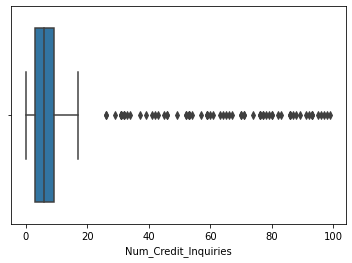

In [60]:
sns.boxplot(df_concat['Num_Credit_Inquiries'])

In [61]:
mode=df_concat["Credit_Mix"].mode()
str(mode[0])

'Standard'

In [62]:
df_concat['Credit_Mix'].value_counts()

Standard    54858
Good        36597
            30000
Bad         28545
Name: Credit_Mix, dtype: int64

In [63]:
#df_concat['Credit_Mix']=df_concat['Credit_Mix'].replace( '_',  str(mode[0]))

In [64]:
df_concat['Credit_Mix'].replace('', np.NaN, inplace=True)
df_concat.Credit_Mix.fillna(method='ffill', inplace = True)
df_concat.Credit_Mix.isnull().sum()

1

In [65]:
df_concat['Credit_Mix']=df_concat['Credit_Mix'].replace( np.NaN,  'Standard')

In [66]:
df_concat.Credit_Mix.isnull().sum()

0

In [67]:
df_concat['Credit_Mix'].value_counts()

Standard    68729
Good        45562
Bad         35709
Name: Credit_Mix, dtype: int64

In [68]:
df_concat['Outstanding_Debt']=df_concat['Outstanding_Debt'].str.strip('_')

In [69]:
df_concat['Outstanding_Debt']=df_concat['Outstanding_Debt'].astype(float)

In [70]:
mode=df_concat["Payment_of_Min_Amount"].mode()
mode

0    Yes
Name: Payment_of_Min_Amount, dtype: object

In [71]:
df_concat["Payment_of_Min_Amount"].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

In [72]:
df_concat['Payment_of_Min_Amount']=df_concat['Payment_of_Min_Amount'].replace( 'NM',  np.NaN)
df_concat.Payment_of_Min_Amount.fillna(method='ffill', inplace = True)
df_concat.Payment_of_Min_Amount.isnull().sum()

0

In [73]:
df_concat["Payment_of_Min_Amount"].value_counts()

Yes    89172
No     60828
Name: Payment_of_Min_Amount, dtype: int64

In [74]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].str.strip('_')

In [75]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].astype(float)

<AxesSubplot:xlabel='Amount_invested_monthly'>

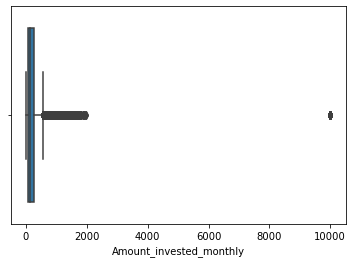

In [76]:
sns.boxplot(df_concat['Amount_invested_monthly'])

In [77]:
df_concat.drop('Monthly_Balance', axis=1, inplace=True)

In [78]:
mode=df_concat["Payment_Behaviour"].mode()
mode

0    Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [79]:
df_concat['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments     0.254713
High_spent_Medium_value_payments   0.176413
Low_spent_Medium_value_payments    0.137987
High_spent_Large_value_payments    0.137100
High_spent_Small_value_payments    0.113273
Low_spent_Large_value_payments     0.104513
!@9#%8                             0.076000
Name: Payment_Behaviour, dtype: float64

In [80]:
df_concat['Payment_Behaviour'] = df_concat_copy['Payment_Behaviour']
df_concat['Payment_Behaviour']=df_concat['Payment_Behaviour'].replace( '!@9#%8',  np.NaN)
df_concat.Payment_Behaviour.fillna(method='ffill', inplace = True)
df_concat.Payment_Behaviour.isnull().sum()

0

In [81]:
#df_concat['Payment_Behaviour']=df_concat['Payment_Behaviour'].replace( '!@9#%8',  mode[0])

In [82]:
df_concat['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments     0.275173
High_spent_Medium_value_payments   0.191400
Low_spent_Medium_value_payments    0.149433
High_spent_Large_value_payments    0.148453
High_spent_Small_value_payments    0.122513
Low_spent_Large_value_payments     0.113027
Name: Payment_Behaviour, dtype: float64

In [83]:
df_target= df_concat['Credit_Score']

In [84]:
df_target=pd.DataFrame(df_target.loc[0:99999])

In [85]:
df_target.shape

(100000, 1)

In [86]:
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Good', 2)
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Standard', 1)
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Poor', 0)

In [87]:
df_concat.isnull().sum()

ID                              0
Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Credit_Score                50000
Credit_History_Age_int          0
dtype: int64

In [88]:
df_concat['Amount_invested_monthly'].isnull().sum()

6750

In [89]:

df_concat.Amount_invested_monthly.fillna(method='ffill', inplace = True)
df_concat.Amount_invested_monthly.isnull().sum()

0

In [90]:
df_concat['Num_Bank_Accounts']=df_concat['Num_Bank_Accounts'].astype(float)
df_concat['Delay_from_due_date']=df_concat['Delay_from_due_date'].astype(float)
df_concat['Interest_Rate']=df_concat['Interest_Rate'].astype(float)

In [91]:
df_concat.isnull().sum()

ID                              0
Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Credit_Score                50000
Credit_History_Age_int          0
dtype: int64

In [92]:
df_concat.describe()

Age   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count 150000.000000   150000.000000          150000.000000      150000.000000   
mean      33.477227   173055.202531            4192.647084          17.006940   
std       10.629711  1404214.602713            3182.841234         117.069476   
min       14.000000     7005.930000             303.645417          -1.000000   
25%       25.000000    19455.490000            1625.558333           3.000000   
50%       33.000000    37578.610000            3091.000000           6.000000   
75%       42.000000    72796.905000            5951.373333           7.000000   
max      100.000000 24198062.000000           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count    150000.000000  150000.000000 150000.000000        150000.000000   
mean          3.614533      14.512340      3.527427            21.063400   
std           2.620297       8.700260      2.605996            14.860154   
min           0.000000       1.000000      0.000000            -5.000000   
25%           2.000000       8.000000      2.000000            10.000000   
50%           3.000000      13.000000      3.000000            18.000000   
75%           5.000000      20.000000      5.000000            28.000000   
max         100.000000     100.000000    100.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           150000.000000         150000.000000         150000.000000   
mean                13.427313             10.166229              6.304133   
std                  6.203571              6.877983              4.142814   
min                  0.000000             -6.490000              0.000000   
25%                  9.000000              4.970000              3.000000   
50%                 14.000000              9.250000              6.000000   
75%                 18.000000             14.640000              9.000000   
max                100.000000             36.970000             99.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count     150000.000000             150000.000000        150000.000000   
mean        1426.220376                 32.283309          1432.513579   
std         1155.127101                  5.113315          8403.759977   
min            0.230000                 20.000000             0.000000   
25%          566.072500                 28.054731            30.947775   
50%         1166.155000                 32.297058            71.280006   
75%         1945.962500                 36.487954           166.279555   
max         4998.070000                 50.000000         82398.000000   

       Amount_invested_monthly  Credit_History_Age_int  
count            150000.000000           150000.000000  
mean                638.163182               18.539662  
std                2045.220592                7.929617  
min                   0.000000                0.083333  
25%                  74.574704               13.000000  
50%                 135.768699               17.916667  
75%                 266.275431               24.500000  
max               10000.000000               34.000000

In [96]:
df_concat.columns.get_loc('Credit_History_Age_int')

22

In [97]:
df_concat['split1'] = df_concat['Payment_Behaviour'].str.split('_')
df_concat.insert(loc=23, column = 'Spending_Behaviour', value=[df_concat['split1'][i][0] for i in range(df_concat.shape[0]) ])
df_concat.insert(loc=24, column = 'Payment_values', value=[df_concat['split1'][i][2] for i in range(df_concat.shape[0]) ])

df_concat.dtypes

ID                           object
Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Credit_Score                 object
Credit_History_Age_int      float64
Spending_Behaviour           object
Payment_values               object
split1                       object
dtype: object

In [98]:
df_concat.drop(['split1', 'Payment_Behaviour'] , axis=1, inplace=True)

In [99]:
cleaned_df_ID = df_concat.copy()

In [100]:
#ID drop
#Customer_ID drop
df_concat =df_concat.drop('ID', axis=1)
df_concat =df_concat.drop('Customer_ID', axis=1)

# EDA: Univariate Analysis

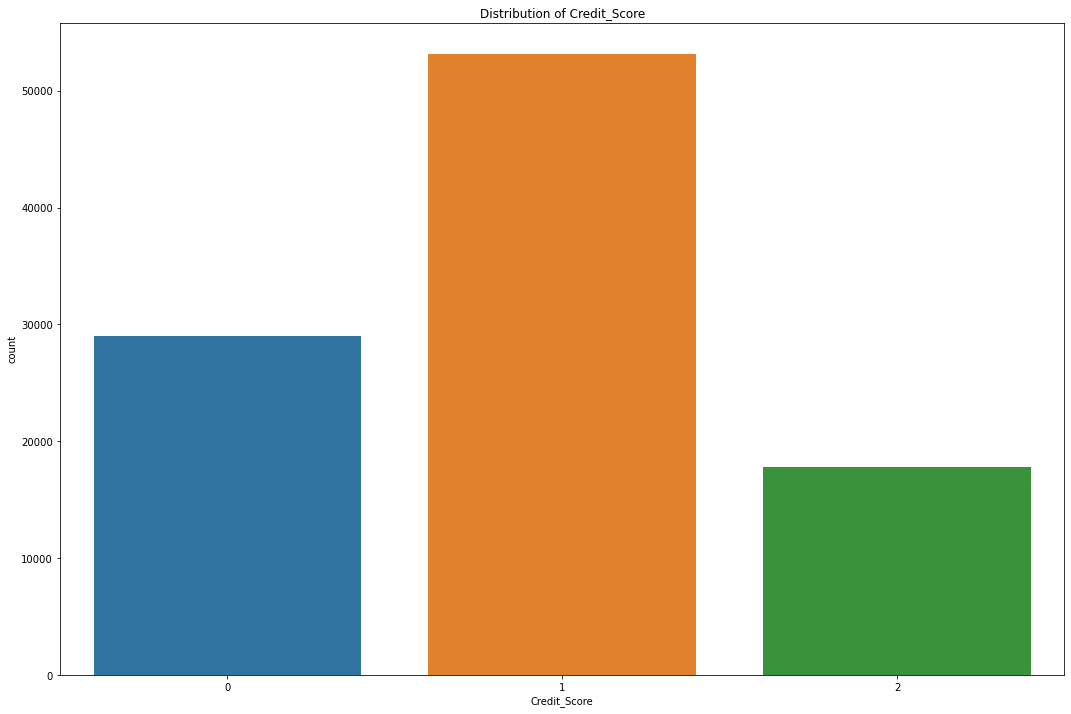

<Figure size 432x288 with 0 Axes>

In [233]:
sns.countplot(df_target['Credit_Score']).set_title('Distribution of Credit_Score')
plt.figure(figsize=(6,4))
plt.show()

In [ ]:
#Data of target variable is fairly balanced.

In [250]:
df_train= df_concat.loc[0:99999]

In [251]:
df_train.shape

(100000, 22)

In [252]:
df_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_Score',
       'Credit_History_Age_int', 'Spending_Behaviour', 'Payment_values'],
      dtype='object')

In [253]:
df_test= df_concat.loc[100000:149999]

In [254]:
#dftrial = df_concat.loc[ 100000:149999, ['Age', 'Occupation']]
#dftrial

In [255]:
df_test.shape

(50000, 22)

In [256]:
df_train.shape

(100000, 22)

In [257]:
df_train_cat= df_train.select_dtypes(include= [np.object])

In [258]:
df_train_cat.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score',
       'Spending_Behaviour', 'Payment_values'],
      dtype='object')

In [259]:
df_train_num=df_train.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Spending_Behaviour', 'Payment_values', 'Credit_Score'], axis=1)
df_train_num.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Credit_History_Age_int'],
      dtype='object')

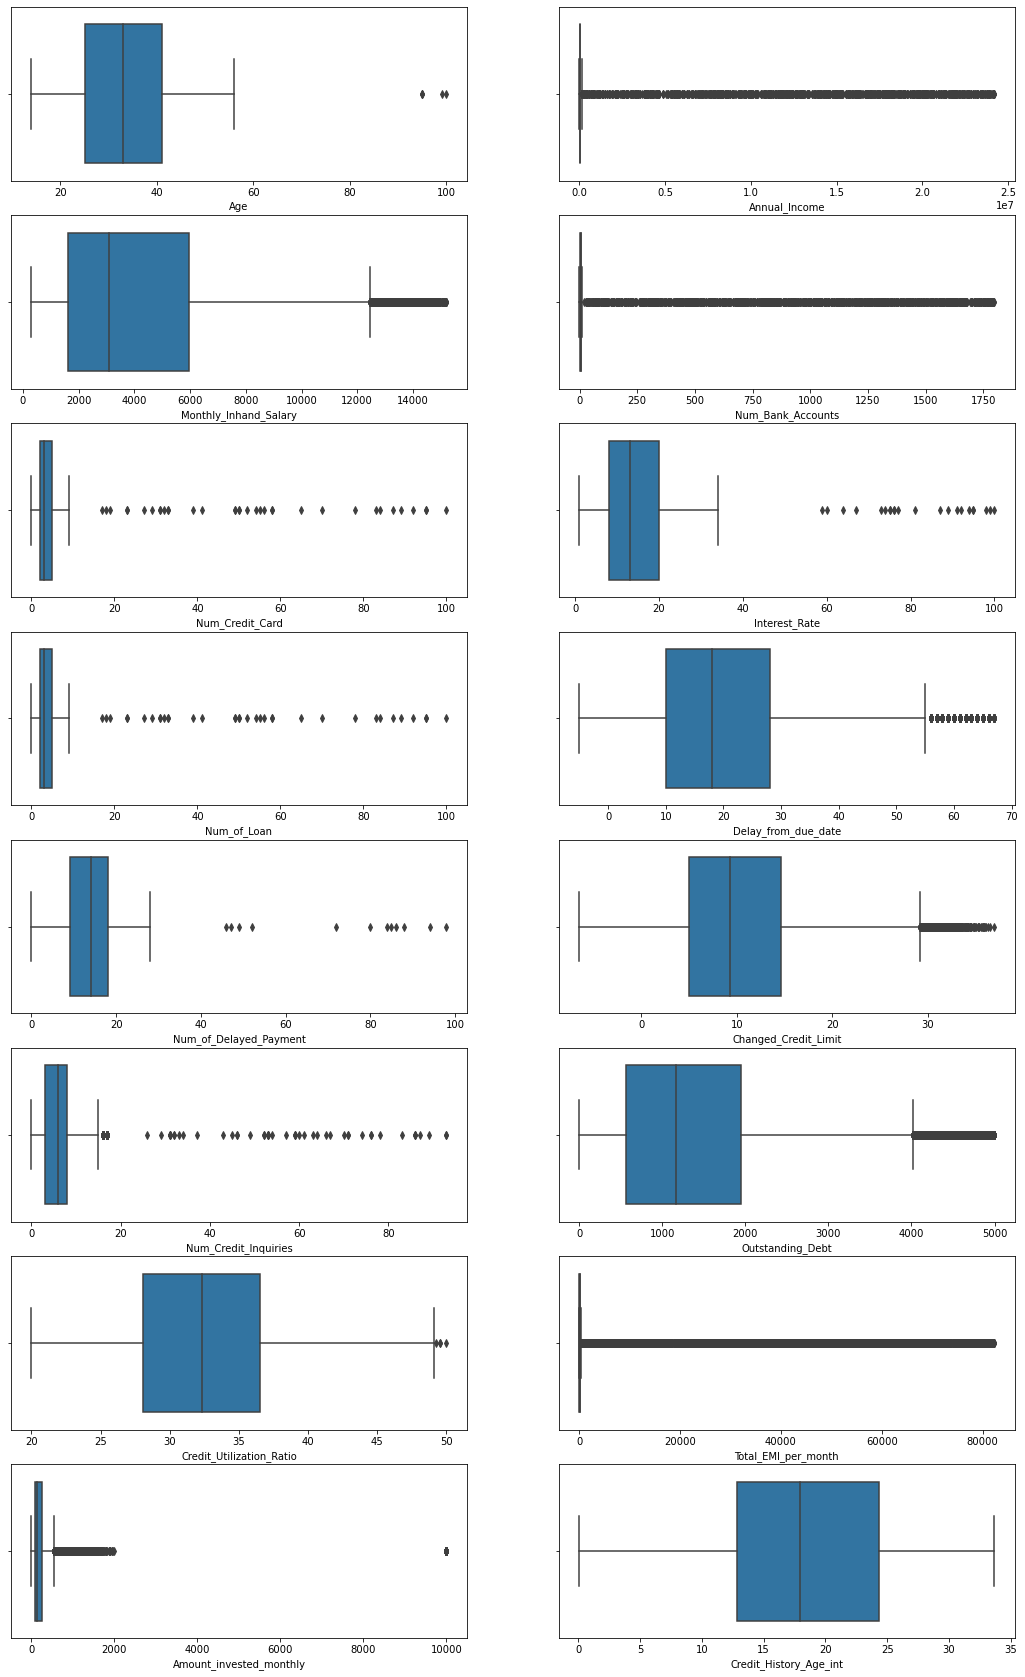

In [260]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(18,30))

for var, subplot in zip(df_train_num.columns, ax.flatten()):
    sns.boxplot(df_train_num[var], ax = subplot)

plt.show()

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

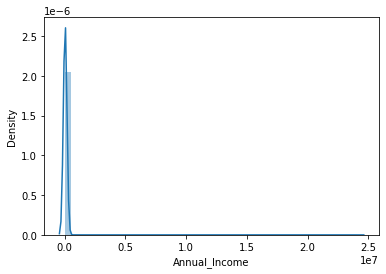

In [113]:
sns.distplot(df_train_num['Annual_Income'], hist=True)

In [261]:
df_train_outlier_treatment = df_train_num[['Age',  'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Changed_Credit_Limit']]

In [262]:
Q1 = df_train_outlier_treatment.quantile(0.25)
Q3 = df_train_outlier_treatment.quantile(0.75)

IQR = Q3-Q1

In [263]:
IQR

Age                    16.000000
Num_Bank_Accounts       4.000000
Num_Credit_Card         3.000000
Interest_Rate          12.000000
Num_of_Loan             3.000000
Delay_from_due_date    18.000000
Changed_Credit_Limit    9.690000
dtype: float64

In [264]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data 
df_train.shape

(94085, 22)

In [265]:
col = df_train_num.columns
col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Credit_History_Age_int'],
      dtype='object')

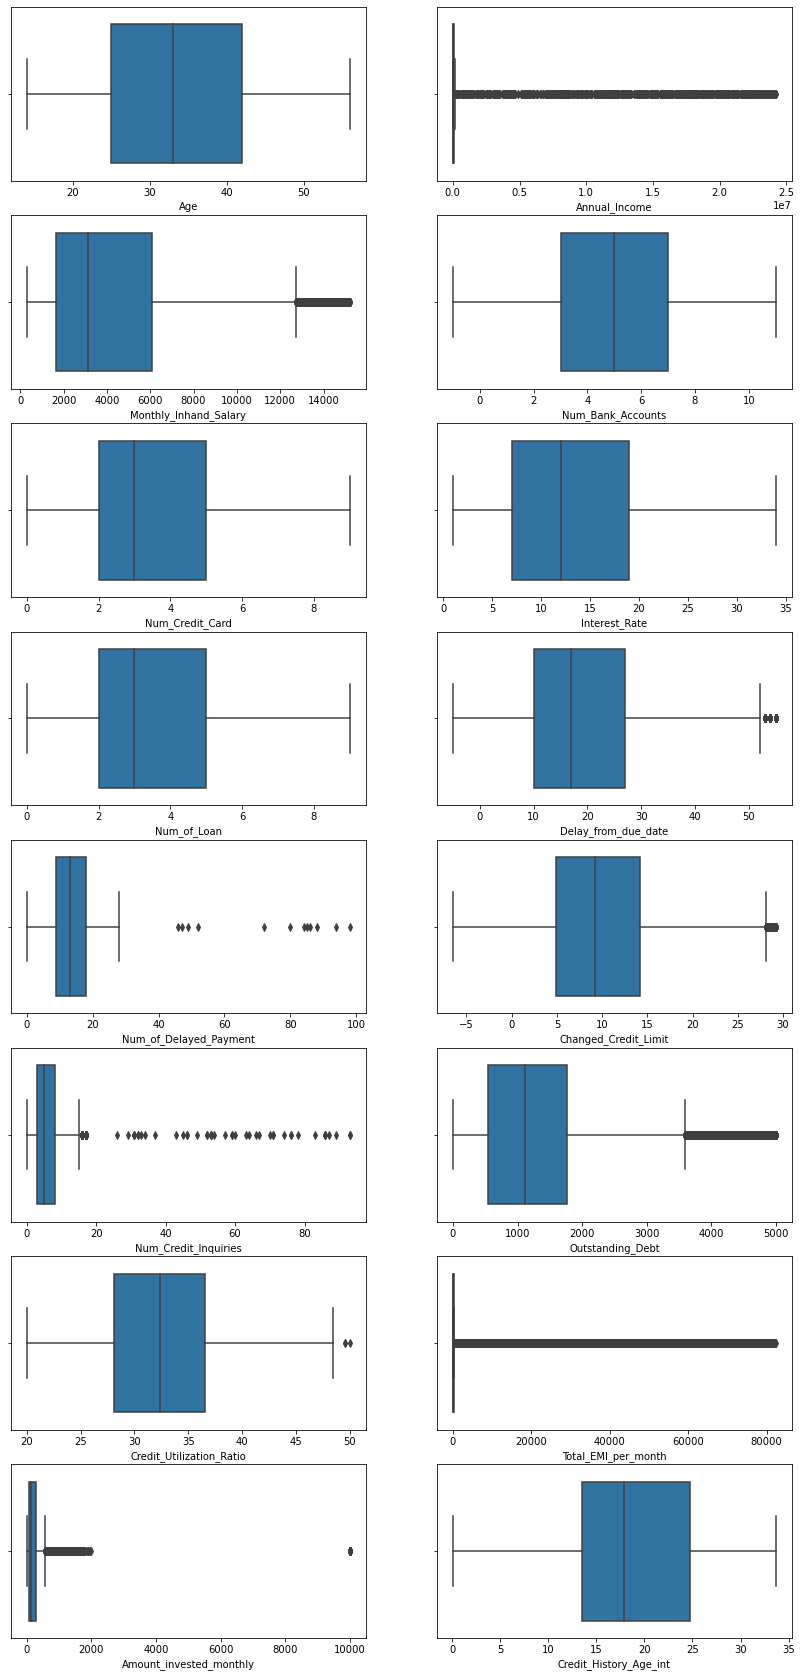

In [266]:
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=(14,30))
for var,subplot in zip(df_train_num.columns,ax.flatten()):
    sns.boxplot(df_train[var],ax=subplot)
plt.show()

In [270]:
Y = df_train['Credit_Score']
Y.shape

(94085,)

In [271]:
Y = df_train['Credit_Score']
Y = Y.replace('Good', 2)
Y = Y.replace('Standard', 1)
Y = Y.replace('Poor', 0)
Y.shape

(94085,)

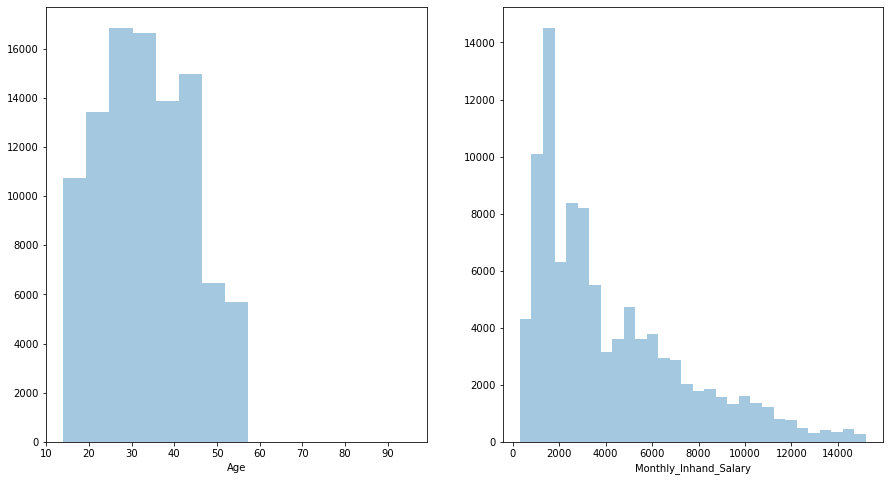

In [121]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.distplot(df_train['Age'], bins=15, kde=False, ax = axes[0], axlabel='Age')
sns.distplot(df_train['Monthly_Inhand_Salary'], bins=30, kde=False, ax = axes[1], axlabel='Monthly_Inhand_Salary')
plt.show()

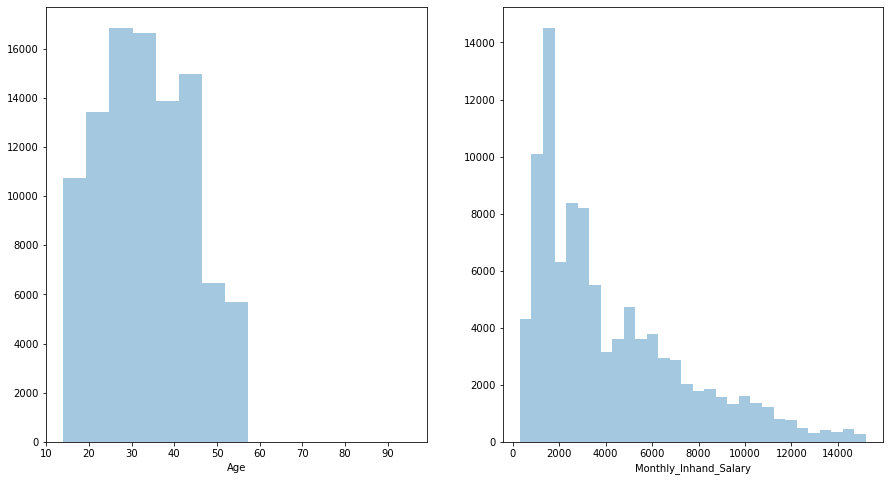

In [122]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.distplot(df_train['Age'], bins=15, kde=False, ax = axes[0], axlabel='Age')
sns.distplot(df_train['Monthly_Inhand_Salary'], bins=30, kde=False, ax = axes[1], axlabel='Monthly_Inhand_Salary')
plt.show()

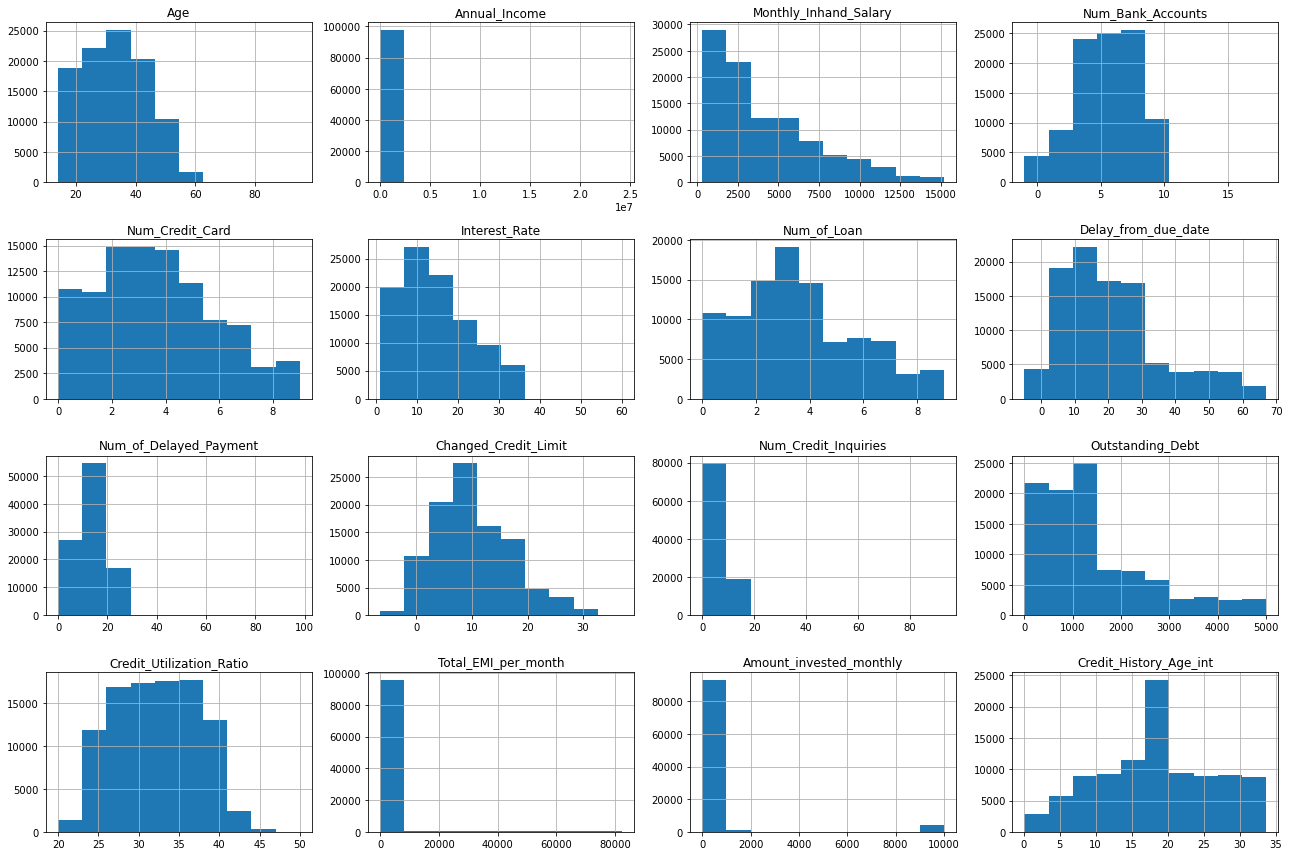

Skewness:


Age                         0.165278
Annual_Income              12.488576
Monthly_Inhand_Salary       1.126633
Num_Bank_Accounts          -0.189262
Num_Credit_Card             0.376661
Interest_Rate               0.515210
Num_of_Loan                 0.483115
Delay_from_due_date         0.967228
Num_of_Delayed_Payment     -0.044635
Changed_Credit_Limit        0.624119
Num_Credit_Inquiries        1.834076
Outstanding_Debt            1.207601
Credit_Utilization_Ratio    0.027995
Total_EMI_per_month         7.101759
Amount_invested_monthly     4.327792
Credit_History_Age_int     -0.033647
dtype: float64

In [125]:
plt.rcParams["figure.figsize"] = [18,12]
df_train.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')

df_train.skew()

In [ ]:
#Numerical data of feature age, Num_Bank_Accounts, Interest_Rate, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Utilization_Ratio,Credit_History_Age is fairly symmetrical.
#Numerical data of feature Delay_from_due_date, Changed_Credit_Limit is moderately skewed.
#Numerical data of feature Annual_Income, Monthly_Inhand_Salary, Outstanding_Debt,Total_EMI_per_month, Amount_invested_monthly is highly skewed.

Text(0.5, 1.0, 'Occupation VS. Credit Score')

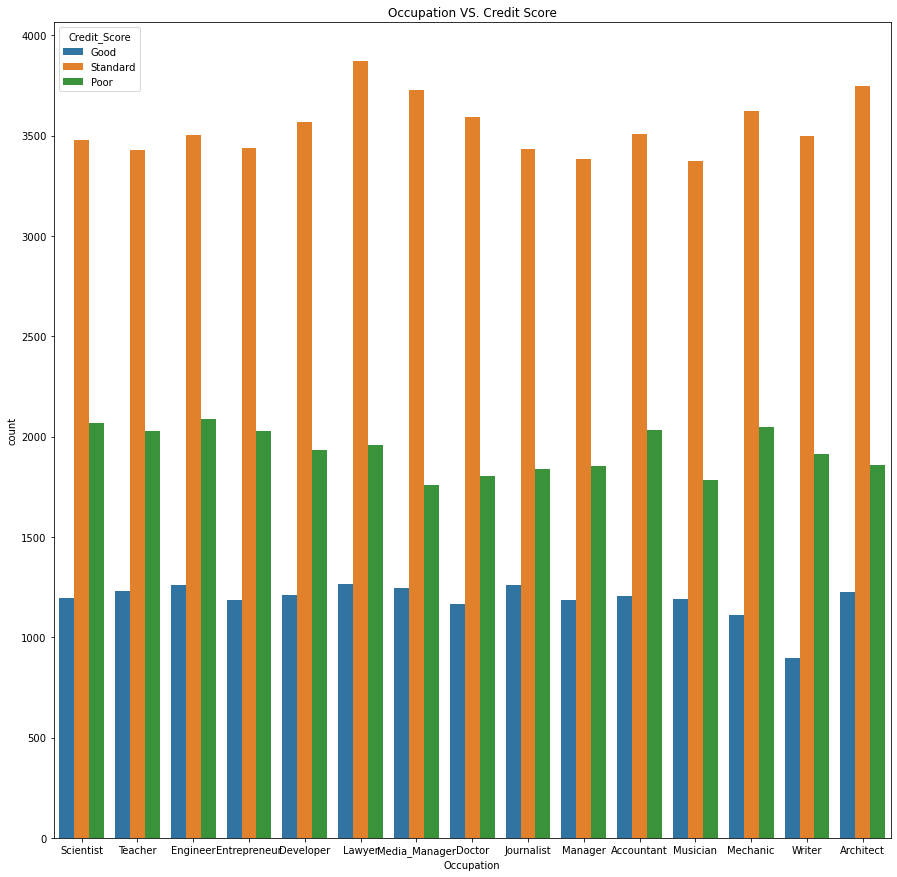

In [126]:
fig = plt.figure(figsize=(15,15))
sns.countplot(x= df_train_cat['Occupation'], hue = df_concat['Credit_Score']).set_title('Occupation VS. Credit Score')

Text(0.5, 1.0, 'Spending_Behaviour VS. Credit Score')

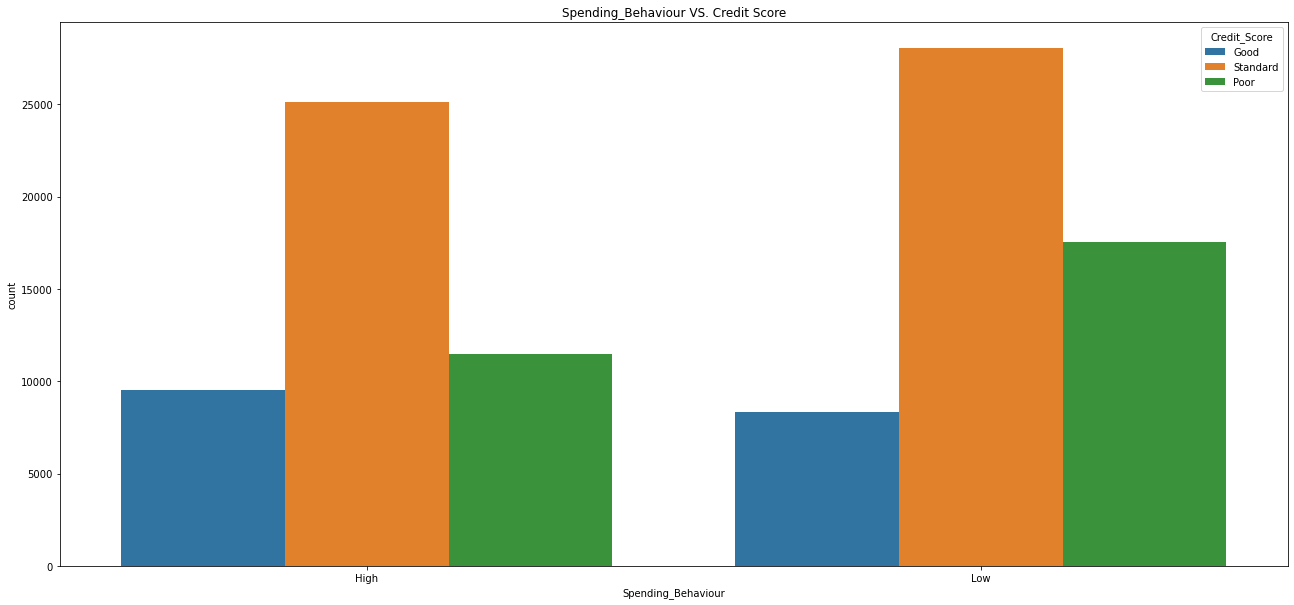

In [128]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Spending_Behaviour'], hue = df_concat['Credit_Score']).set_title('Spending_Behaviour VS. Credit Score')

In [ ]:
# The customers with low spending behaviour are generally having standard or poor credit score.

Text(0.5, 1.0, 'Payment_values VS. Credit Score')

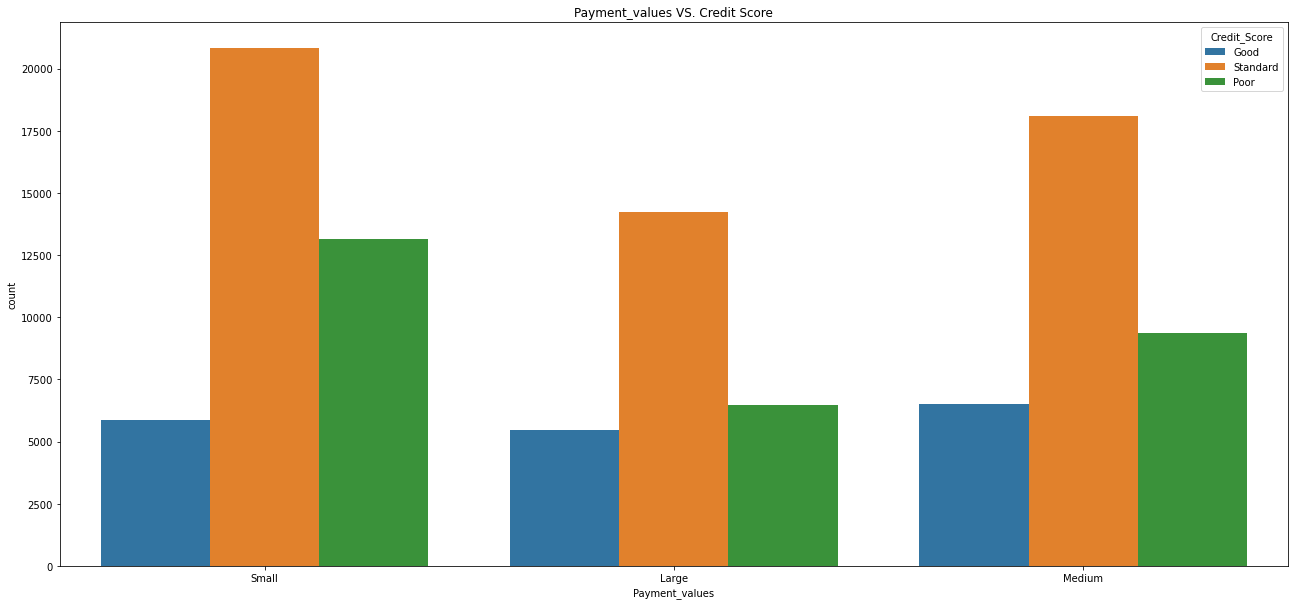

In [129]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Payment_values'], hue = df_concat['Credit_Score']).set_title('Payment_values VS. Credit Score')

In [ ]:
# The customers with small payment values are generally having standard or poor credit score.

Text(0.5, 1.0, 'Payment_of_Min_Amount VS. Credit Score')

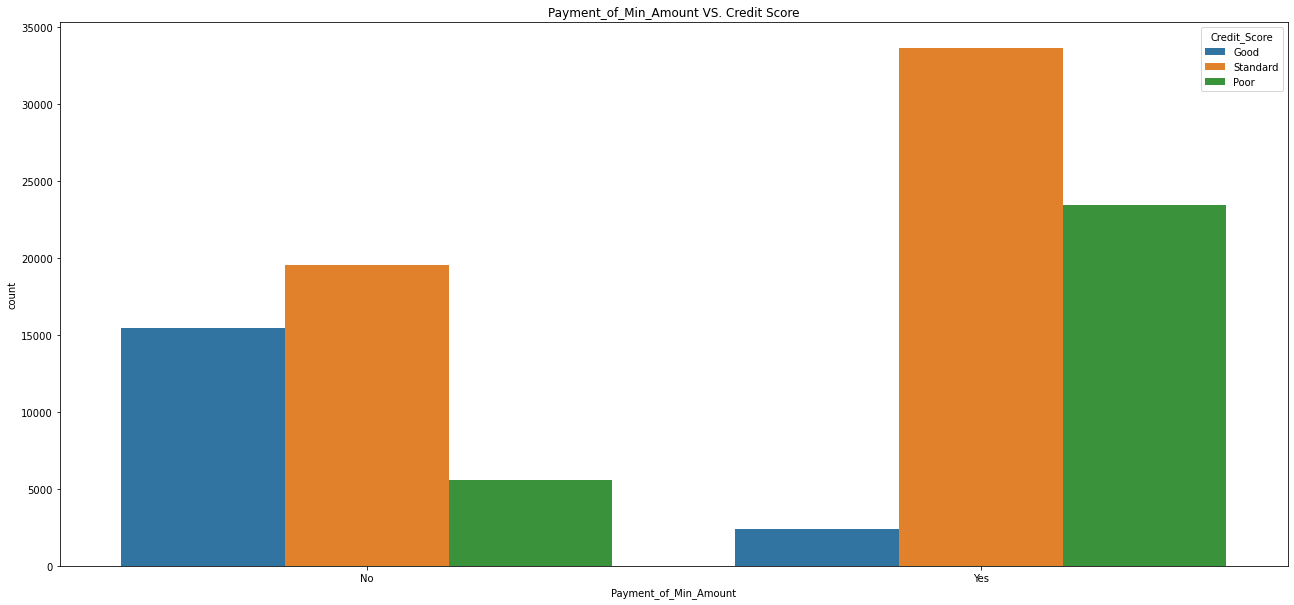

In [130]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Payment_of_Min_Amount'], hue = df_concat['Credit_Score']).set_title('Payment_of_Min_Amount VS. Credit Score')

In [ ]:
#Customers who has not paid only the minimum amount are having higher credit score.

Multivariate analysis

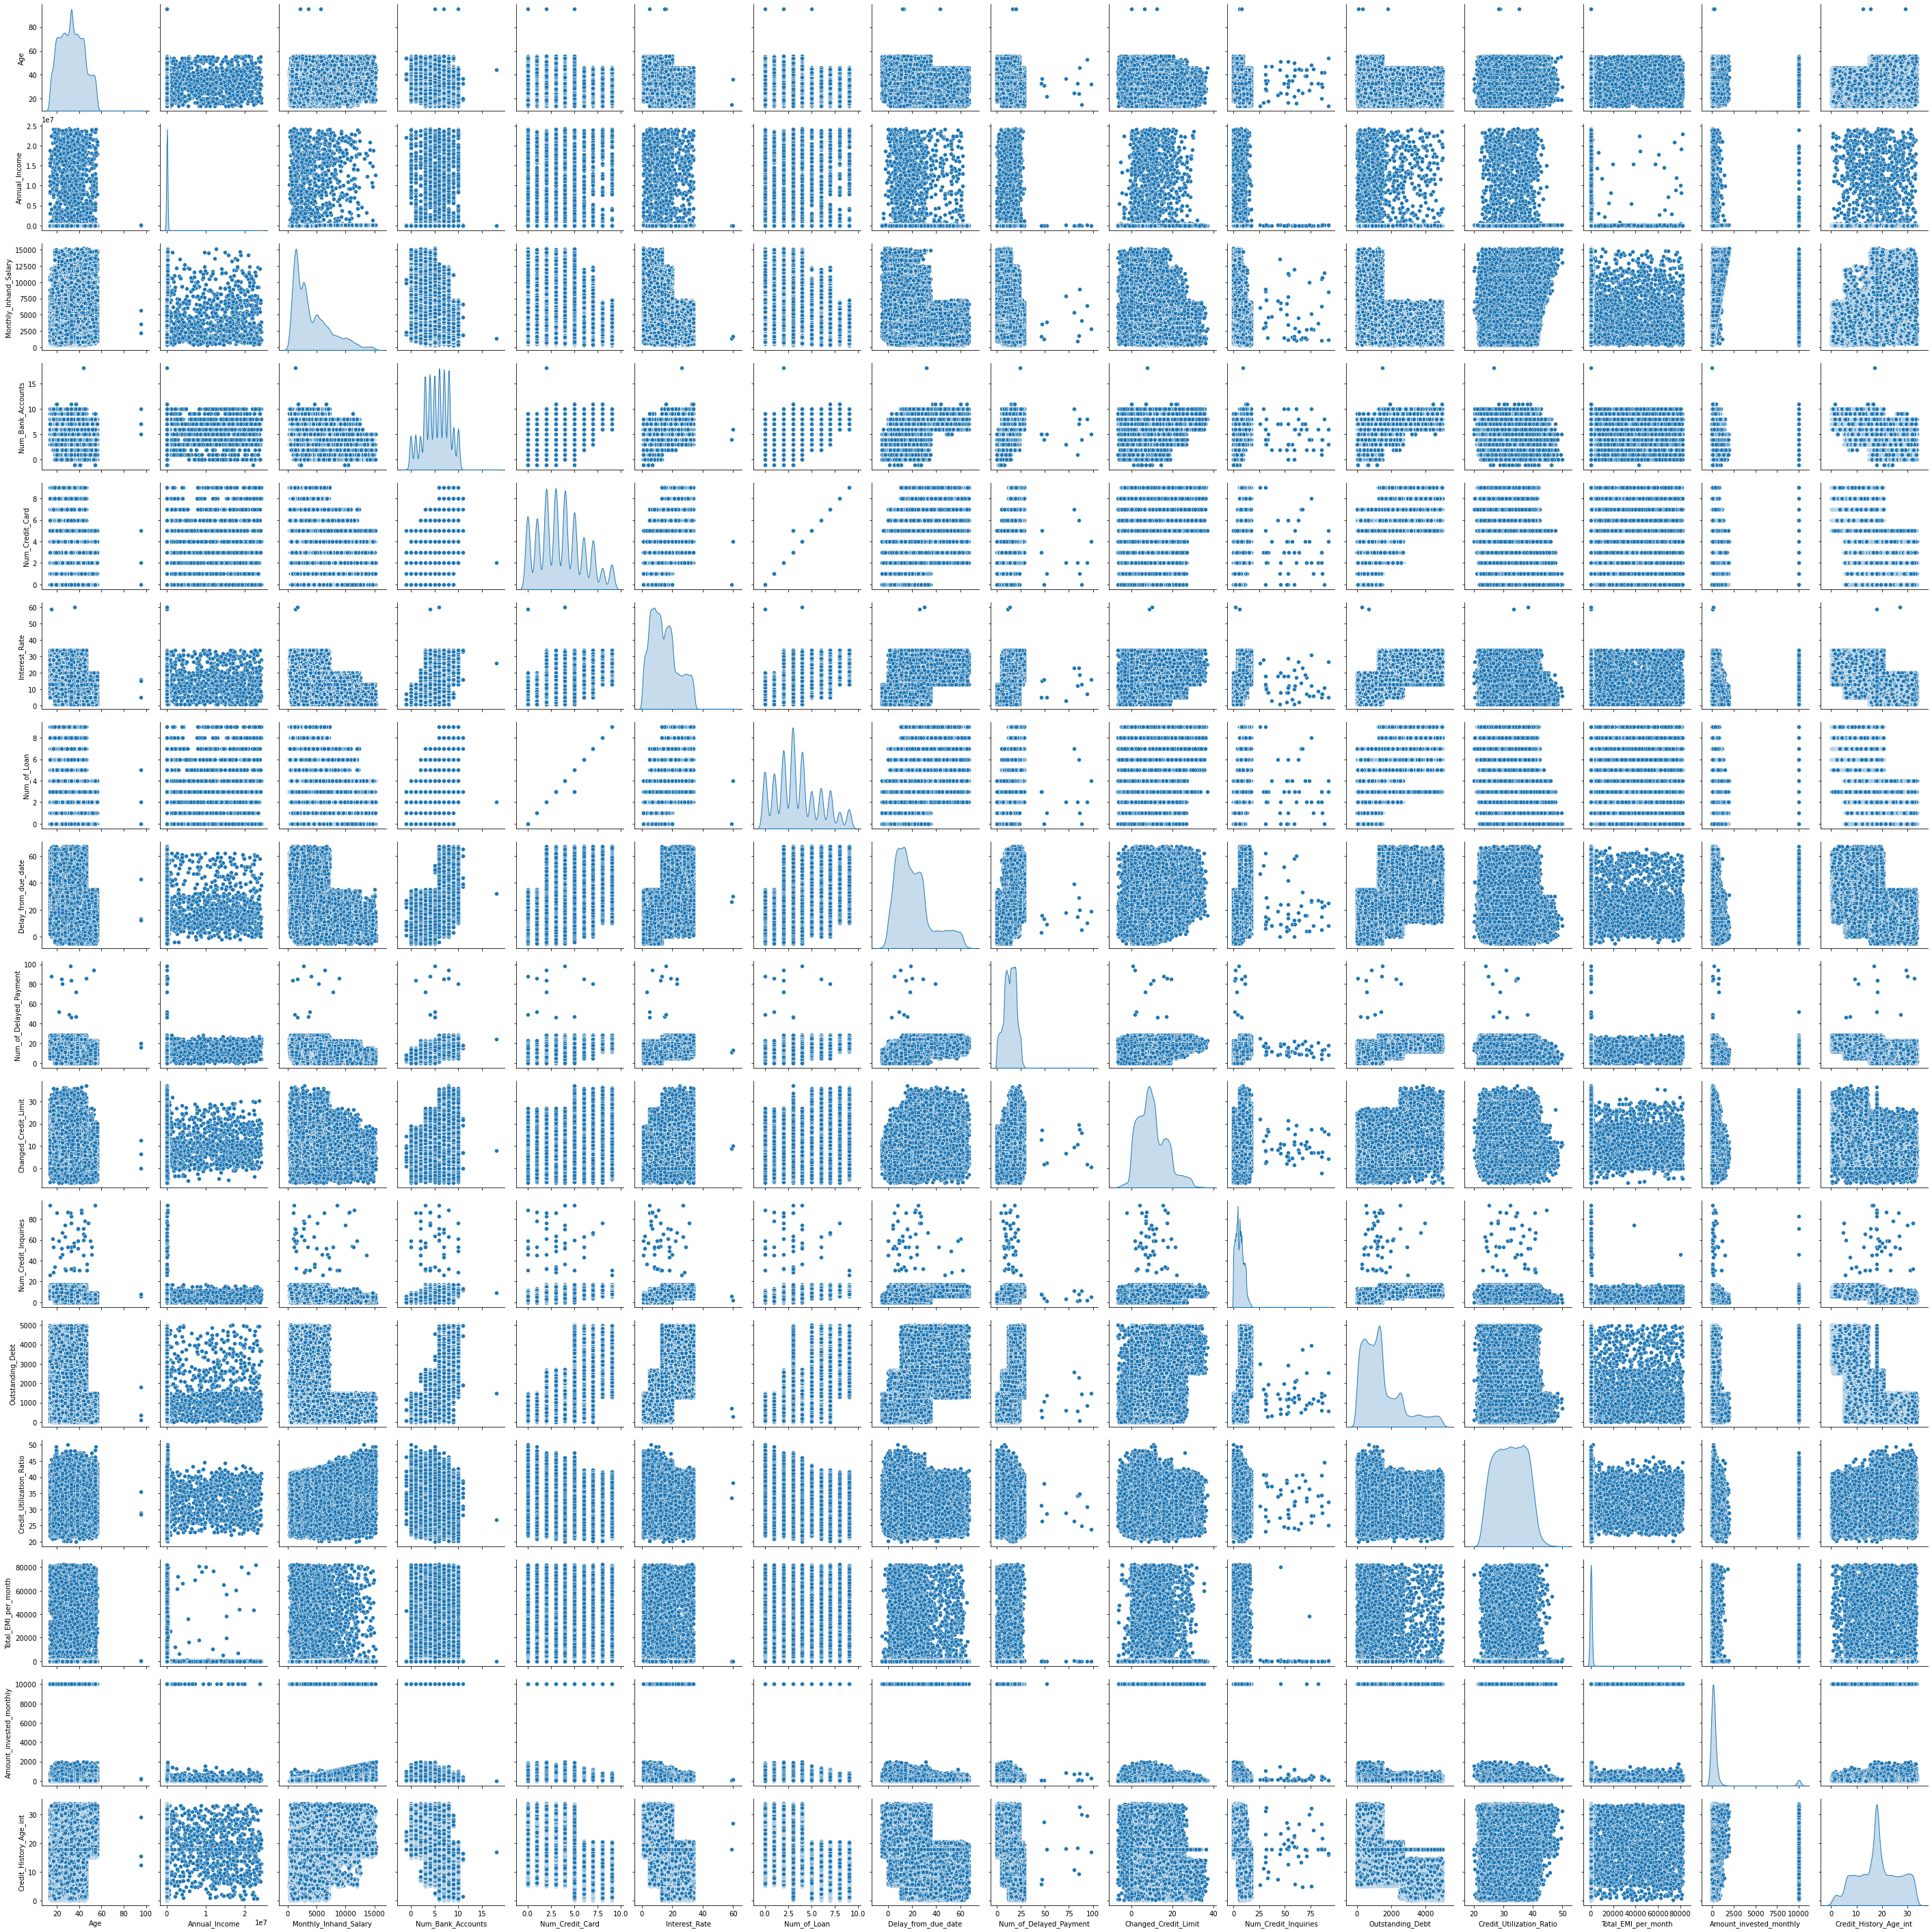

In [131]:
sns.pairplot(df_train, diag_kind = 'kde')

# display the plot
plt.show()

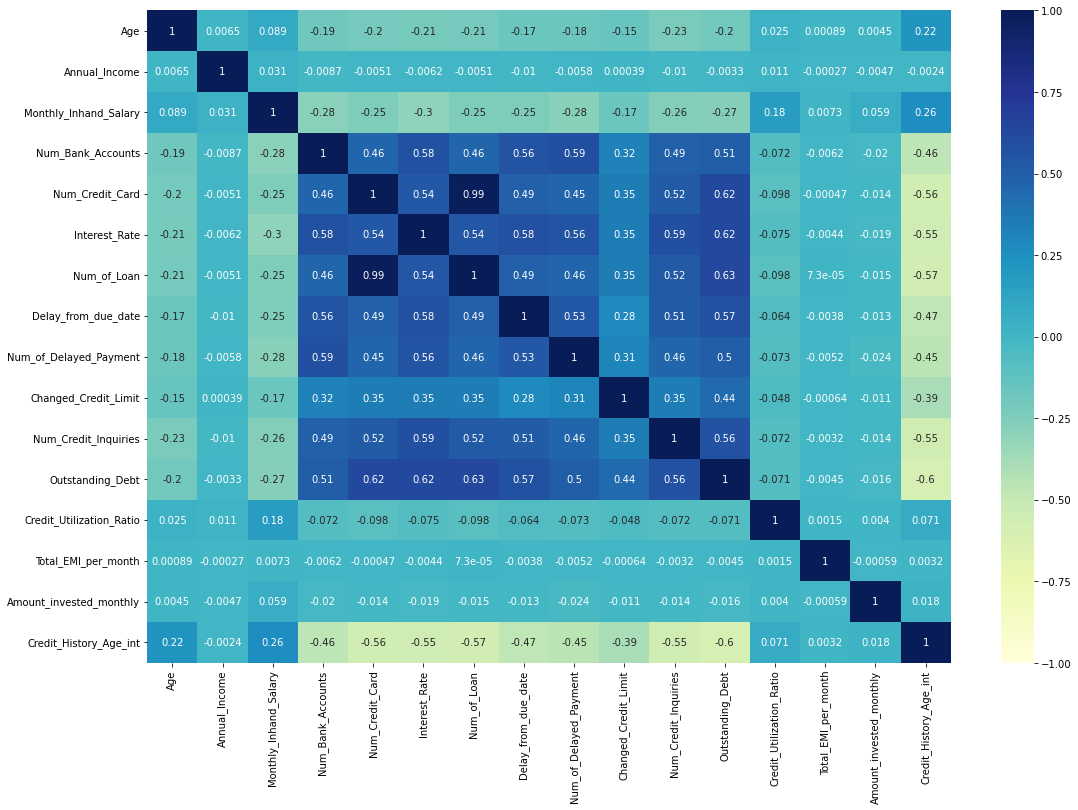

In [132]:
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

In [ ]:
#Number of loans and number of credit cards are found to be highly corelated.

In [178]:
df_concat_new =df_concat.drop('Num_Credit_Card', axis=1)

# Statistical Analysis

Annual income

In [134]:
import statistics as st
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

In [135]:
# Hypothesis :
# Null hypothesis: Data is normal 
# Alternate hypothesis: Data is not normal.

stat, p_value = shapiro(df_train['Annual_Income'])
stat, p_value
# alpha = 0.01




(0.07397854328155518, 0.0)

In [136]:
# p < alpha
# Do reject null hypothesis.
# Data is not normal.

Lambda value used for Transformation: -0.2691780753912002


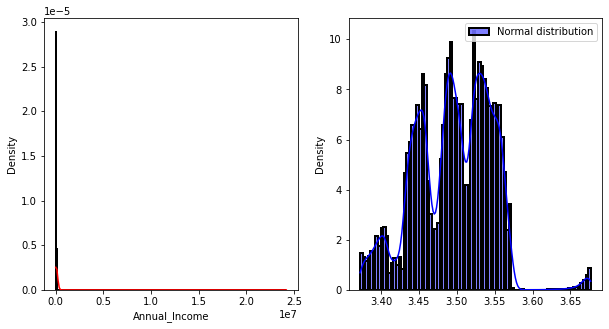

In [272]:
fittedData, lambdaValue = stats.boxcox(df_train['Annual_Income'])  
  
# creating the axes to draw plots of datasets  
fig, ax = plt.subplots(1, 2)  
  
#plotting the non-normal or original data using histplot() function  
sns.histplot(df_train['Annual_Income'], kde = True,stat="density",linewidth=2,label = "Non-Normal distribution", color ="red", ax = ax[0])  
  
#plotting the normal or original data using the histplot() function  
sns.histplot(fittedData, kde = True,stat="density",linewidth=2,label = "Normal distribution", color ="blue", ax = ax[1])  
  
# adding legends to the subplots  
plt.legend(loc = "upper right")  
# rescaling the subplots  
fig.set_figheight(5)  
fig.set_figwidth(10)  
print(f"Lambda value used for Transformation: {lambdaValue}")  
#displaying the plots  
plt.show()  

In [274]:
df_train['Annual_Income'] = fittedData
df_train['Annual_Income'].head()

0   3.453488
1   3.453488
2   3.453488
3   3.453488
4   3.453488
Name: Annual_Income, dtype: float64

In [141]:
stat, p_value = shapiro(df_train['Annual_Income'])
stat, p_value


(0.9716944694519043, 0.0)

dependence of the Occupation and Credit Score

In [179]:
Occupation=df_train["Occupation"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Occupation, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (162.21974099238903, 7.461002251213199e-21, 28, array([[1173.16657278, 1725.23708349, 3400.59634373],
       [1208.55340384, 1777.27630334, 3503.17029282],
       [1172.23534038, 1723.86763033, 3397.89702928],
       [1160.50181219, 1706.61252059, 3363.88566722],
       [1178.75396716, 1733.45380241, 3416.79223043],
       [1167.02043896, 1716.19869267, 3382.78086836],
       [1160.12931923, 1706.06473933, 3362.80594144],
       [1251.01760111, 1839.72336717, 3626.25903173],
       [1117.66512196, 1643.61767551, 3239.71720253],
       [1184.71385449, 1742.2183026 , 3434.06784291],
       [1182.66514322, 1739.20550566, 3428.12935112],
       [1106.67657969, 1627.45812829, 3207.86529202],
       [1189.74250943, 1749.61334963, 3448.64414094],
       [1148.95453048, 1689.63130148, 3330.41416804],
       [1121.20380507, 1648.82159749, 3249.97459744]]))
Chi_square_critical:  3.8414588206941285


In [ ]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Occupation and Credit score for 95% confidence level.

a relationship between the Payment Behaviour and Credit Score

In [180]:
Spending_Behaviour=df_train["Spending_Behaviour"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Spending_Behaviour, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (861.6731921303306, 7.763252769659884e-188, 2, array([[ 8129.84506563, 11955.5999256 , 23565.55500877],
       [ 9393.15493437, 13813.4000744 , 27227.44499123]]))
Chi_square_critical:  3.8414588206941285


In [ ]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Spending Behaviour and Credit score for 95% confidence level.

In [181]:
Payment_values=df_train["Payment_values"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Payment_values, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (732.8572646873195, 2.674483716372367e-157, 4, array([[ 4617.4227135 ,  6790.29651911, 13384.28076739],
       [ 5972.73834299,  8783.39863953, 17312.86301748],
       [ 6932.83894351, 10195.30484137, 20095.85621512]]))
Chi_square_critical:  3.8414588206941285


In [ ]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Payment_values and Credit score for 95% confidence level.

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98629 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98629 non-null  float64
 1   Occupation                98629 non-null  object 
 2   Annual_Income             98629 non-null  float64
 3   Monthly_Inhand_Salary     98629 non-null  float64
 4   Num_Bank_Accounts         98629 non-null  float64
 5   Num_Credit_Card           98629 non-null  float64
 6   Interest_Rate             98629 non-null  float64
 7   Num_of_Loan               98629 non-null  float64
 8   Delay_from_due_date       98629 non-null  float64
 9   Num_of_Delayed_Payment    98629 non-null  float64
 10  Changed_Credit_Limit      98629 non-null  float64
 11  Num_Credit_Inquiries      98629 non-null  float64
 12  Credit_Mix                98629 non-null  object 
 13  Outstanding_Debt          98629 non-null  float64
 14  Credit

# Modelling

In [275]:
df1= df_train.copy()

In [276]:
df_train.drop('Credit_Score', axis=1,inplace=True)

In [277]:
df_cat=df_train.select_dtypes(include=[np.object])

In [278]:
df_num=df_train.select_dtypes(include=[np.number])

In [279]:
df_cat.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Spending_Behaviour', 'Payment_values'],
      dtype='object')

In [280]:
df_num.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Credit_History_Age_int'],
      dtype='object')

In [281]:
df_cat.shape

(94085, 5)

In [282]:
df_num.shape

(94085, 16)

In [214]:

#df_num=df_num.apply(lambda rec:(rec-rec.mean())/rec.std())
#df_num.head()

In [283]:
encode=pd.get_dummies(data=df_cat,drop_first=True)
encode.head()

Occupation_Architect  Occupation_Developer  Occupation_Doctor  \
0                     0                     0                  0   
1                     0                     0                  0   
2                     0                     0                  0   
3                     0                     0                  0   
4                     0                     0                  0   

   Occupation_Engineer  Occupation_Entrepreneur  Occupation_Journalist  \
0                    0                        0                      0   
1                    0                        0                      0   
2                    0                        0                      0   
3                    0                        0                      0   
4                    0                        0                      0   

   Occupation_Lawyer  Occupation_Manager  Occupation_Mechanic  \
0                  0                   0                    0   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   

   Occupation_Media_Manager  Occupation_Musician  Occupation_Scientist  \
0                         0                    0                     1   
1                         0                    0                     1   
2                         0                    0                     1   
3                         0                    0                     1   
4                         0                    0                     1   

   Occupation_Teacher  Occupation_Writer  Credit_Mix_Good  \
0                   0                  0                0   
1                   0                  0                1   
2                   0                  0                1   
3                   0                  0                1   
4                   0                  0                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_Yes  Spending_Behaviour_Low  \
0                    1                          0                       0   
1                    0                          0                       1   
2                    0                          0                       1   
3                    0                          0                       1   
4                    0                          0                       0   

   Payment_values_Medium  Payment_values_Small  
0                      0                     1  
1                      0                     0  
2                      1                     0  
3                      0                     1  
4                      1                     0

In [284]:
df_train_full=pd.concat([df_num,encode],axis=1)
df_train_full.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 23.000000       3.453488            1824.843333           3.000000   
1 23.000000       3.453488            1824.843333           3.000000   
2 33.000000       3.453488            1824.843333           3.000000   
3 23.000000       3.453488            1824.843333           3.000000   
4 23.000000       3.453488            1824.843333           3.000000   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0         4.000000       3.000000     4.000000             3.000000   
1         4.000000       3.000000     4.000000            -1.000000   
2         4.000000       3.000000     4.000000             3.000000   
3         4.000000       3.000000     4.000000             5.000000   
4         4.000000       3.000000     4.000000             6.000000   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                7.000000             11.270000              4.000000   
1                6.500000             11.270000              4.000000   
2                7.000000              0.000000              4.000000   
3                4.000000              6.270000              4.000000   
4                6.500000             11.270000              4.000000   

   Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0        809.980000                 26.822620            49.574949   
1        809.980000                 31.944960            49.574949   
2        809.980000                 28.609352            49.574949   
3        809.980000                 31.377862            49.574949   
4        809.980000                 24.797347            49.574949   

   Amount_invested_monthly  Credit_History_Age_int  Occupation_Architect  \
0                80.415295               22.083333                     0   
1               118.280222               17.916667                     0   
2                81.699521               22.250000                     0   
3               199.458074               22.333333                     0   
4                41.420153               22.416667                     0   

   Occupation_Developer  Occupation_Doctor  Occupation_Engineer  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   Occupation_Entrepreneur  Occupation_Journalist  Occupation_Lawyer  \
0                        0                      0                  0   
1                        0                      0                  0   
2                        0                      0                  0   
3                        0                      0                  0   
4                        0                      0                  0   

   Occupation_Manager  Occupation_Mechanic  Occupation_Media_Manager  \
0                   0                    0                         0   
1                   0                    0                         0   
2                   0                    0                         0   
3                   0                    0                         0   
4                   0                    0                         0   

   Occupation_Musician  Occupation_Scientist  Occupation_Teacher  \
0                    0                     1                   0   
1                    0                     1                   0   
2                    0                     1                   0   
3                    0                     1                   0   
4                    0                     1                   0   

   Occupation_Writer  Credit_Mix_Good  Credit_Mix_Standard  \
0                  0                0                    1   
1                  0         

In [285]:
df_train_full.shape

(94085, 36)

In [286]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

In [287]:
X=df_train_full.copy()
y=Y.copy()

# Train Test Split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25)


# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (70563, 36)
y_train (70563,)
X_test (23522, 36)
y_test (23522,)


In [221]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model

from sklearn import metrics

Decision Tree (Entropy)

In [222]:
from sklearn.metrics import cohen_kappa_score

In [289]:
decision_tree_full_ent = DecisionTreeClassifier(criterion = 'entropy', random_state=10)
decision_tree_full_ent = decision_tree_full_ent.fit(X_train, y_train)
y_pred_decision_tree_full_ent = decision_tree_full_ent.predict(X_test)



table_dct_train = classification_report(y_test, y_pred_decision_tree_full_ent)

# print the table
print(table_dct_train)

kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full_ent)
print('kappa value for test dataset:',kappa)

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6467
           1       0.74      0.74      0.74     12663
           2       0.65      0.64      0.64      4392

    accuracy                           0.71     23522
   macro avg       0.69      0.69      0.69     23522
weighted avg       0.71      0.71      0.71     23522

kappa value for test dataset: 0.5193239948989796


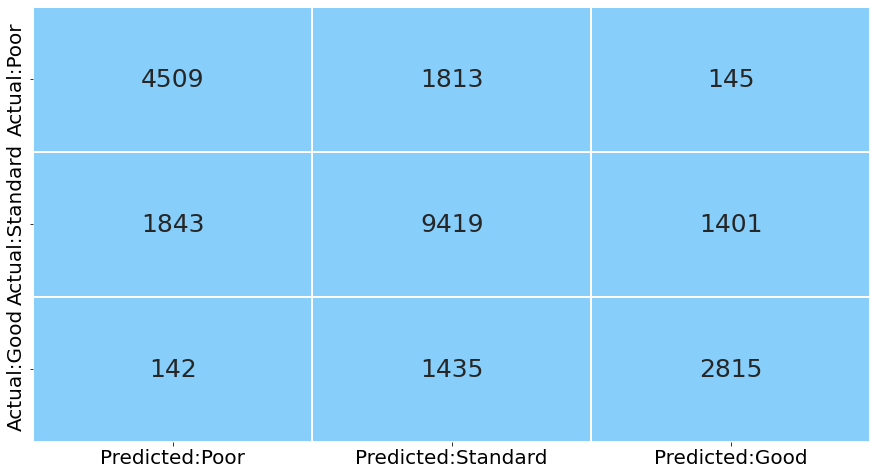

In [291]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full_ent)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:Poor','Predicted:Standard','Predicted:Good'], index = ['Actual:Poor','Actual:Standard', 'Actual:Good'])

plt.rcParams['figure.figsize'] = [15,8]

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [292]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full_ent.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

Features  Importance
11           Outstanding_Debt    0.187563
31        Credit_Mix_Standard    0.095136
15     Credit_History_Age_int    0.067857
14    Amount_invested_monthly    0.062538
12   Credit_Utilization_Ratio    0.061512
7         Delay_from_due_date    0.060555
5               Interest_Rate    0.060272
9        Changed_Credit_Limit    0.053072
13        Total_EMI_per_month    0.047862
0                         Age    0.045952
2       Monthly_Inhand_Salary    0.043195
1               Annual_Income    0.039100
8      Num_of_Delayed_Payment    0.038030
10       Num_Credit_Inquiries    0.027301
3           Num_Bank_Accounts    0.023213
4             Num_Credit_Card    0.010291
6                 Num_of_Loan    0.008846
33     Spending_Behaviour_Low    0.007650
34      Payment_values_Medium    0.007361
35       Payment_values_Small    0.007032
27       Occupation_Scientist    0.004355
20    Occupation_Entrepreneur    0.003843
28         Occupation_Teacher    0.003309
24        Occupation_Mechanic    0.003238
17       Occupation_Developer    0.003225
26        Occupation_Musician    0.002987
19        Occupation_Engineer    0.002928
32  Payment_of_Min_Amount_Yes    0.002827
21      Occupation_Journalist    0.002740
29          Occupation_Writer    0.002680
16       Occupation_Architect    0.002663
18          Occupation_Doctor    0.002660
23         Occupation_Manager    0.002456
22          Occupation_Lawyer    0.002394
25   Occupation_Media_Manager    0.002290
30            Credit_Mix_Good    0.001068

Random Forest

In [293]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

kappa = cohen_kappa_score(y_test, y_pred_rf)
print('kappa value for test dataset:',kappa)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6467
           1       0.79      0.80      0.80     12663
           2       0.72      0.66      0.69      4392

    accuracy                           0.77     23522
   macro avg       0.76      0.75      0.75     23522
weighted avg       0.77      0.77      0.77     23522

kappa value for test dataset: 0.6185103800885328


Adaboost

In [236]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [294]:
ada_model = AdaBoostClassifier(n_estimators = 140, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=140, random_state=10)

In [295]:
y_pred_ada = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_ada))

kappa = cohen_kappa_score(y_test, y_pred_ada)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.69      0.55      0.61      6467
           1       0.71      0.72      0.71     12663
           2       0.52      0.65      0.58      4392

    accuracy                           0.66     23522
   macro avg       0.64      0.64      0.64     23522
weighted avg       0.67      0.66      0.66     23522

kappa value: 0.43564596863324634


Gradient Boosting

In [296]:
gboost_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=10)

In [243]:
y_pred_gboost = gboost_model.predict(X_test)

print(classification_report(y_test, y_pred_gboost))

kappa = cohen_kappa_score(y_test, y_pred_gboost)
print('kappa value:',kappa)

              precision    recall  f1-score   support

        Good       0.67      0.76      0.71      4392
        Poor       0.78      0.75      0.76      6467
    Standard       0.81      0.79      0.80     12663

    accuracy                           0.77     23522
   macro avg       0.75      0.77      0.76     23522
weighted avg       0.78      0.77      0.77     23522

kappa value: 0.6248273038787167


XG Boosting

In [297]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [298]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
kappa = cohen_kappa_score(y_test, y_pred_xgb)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6467
           1       0.81      0.81      0.81     12663
           2       0.73      0.75      0.74      4392

    accuracy                           0.79     23522
   macro avg       0.78      0.78      0.78     23522
weighted avg       0.79      0.79      0.79     23522

kappa value: 0.6525461648671577


In [ ]:
#XGBoost model shows best performance parameters on test set.

# Hypertuning Parameters

In [301]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4],
                     'max_depth': range(5,8),
                     'gamma': [ 1, 2,3,4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5} 



In [303]:
def get_test_report(model):

    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

In [304]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      6467
           1       0.79      0.72      0.75     12663
           2       0.54      0.78      0.64      4392

    accuracy                           0.71     23522
   macro avg       0.69      0.71      0.69     23522
weighted avg       0.73      0.71      0.71     23522



In [305]:
xgb_grid_model = XGBClassifier(learning_rate =0.1,
                               max_depth = 10,
                              gamma = 1)

xgb_model = xgb_grid_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      6467
           1       0.81      0.78      0.80     12663
           2       0.66      0.77      0.71      4392

    accuracy                           0.77     23522
   macro avg       0.75      0.77      0.76     23522
weighted avg       0.78      0.77      0.77     23522



# Feature Importance

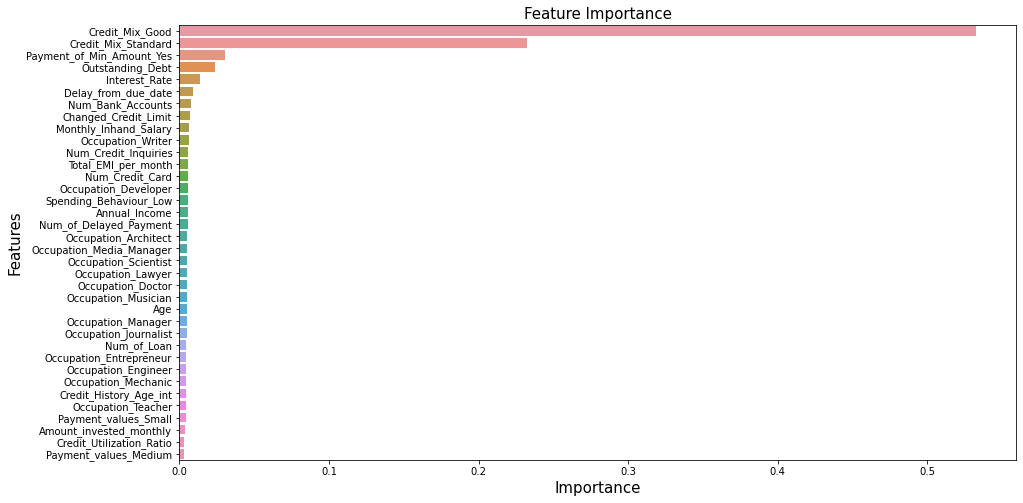

In [306]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)


sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Using Test Dataset (df_test) for testing the model

Testing the model on test dataset (remaining 50000 observations)

In [307]:
df2=df_test.copy()

In [308]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 100000 to 149999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  float64
 5   Num_Credit_Card           50000 non-null  float64
 6   Interest_Rate             50000 non-null  float64
 7   Num_of_Loan               50000 non-null  float64
 8   Delay_from_due_date       50000 non-null  float64
 9   Num_of_Delayed_Payment    50000 non-null  float64
 10  Changed_Credit_Limit      50000 non-null  float64
 11  Num_Credit_Inquiries      50000 non-null  float64
 12  Credit_Mix                50000 non-null  object 
 13  Outstanding_Debt          50000 non-null  float64
 14  

In [ ]:
#yt = pd.DataFrame(df_test['Credit_Score'])

In [309]:
df_test = df_test.drop('Credit_Score', axis=1)

In [310]:
df_test_num = df_test.select_dtypes(include=np.number)

In [311]:
df_test_cat = df_test.select_dtypes(include=np.object)

In [312]:
df_test_num.shape

(50000, 16)

In [313]:
df_test_cat.shape

(50000, 5)

In [ ]:
#df_test_num = df_test_num.apply(lambda rec:(rec-rec.mean())/rec.std())
#df_test_num.head()

In [314]:
encode=pd.get_dummies(data=df_test_cat,drop_first=True)
encode.head()

Occupation_Architect  Occupation_Developer  Occupation_Doctor  \
100000                     0                     0                  0   
100001                     0                     0                  0   
100002                     0                     0                  0   
100003                     0                     0                  0   
100004                     0                     0                  0   

        Occupation_Engineer  Occupation_Entrepreneur  Occupation_Journalist  \
100000                    0                        0                      0   
100001                    0                        0                      0   
100002                    0                        0                      0   
100003                    0                        0                      0   
100004                    0                        0                      0   

        Occupation_Lawyer  Occupation_Manager  Occupation_Mechanic  \
100000                  0                   0                    0   
100001                  0                   0                    0   
100002                  0                   0                    0   
100003                  0                   0                    0   
100004                  0                   0                    0   

        Occupation_Media_Manager  Occupation_Musician  Occupation_Scientist  \
100000                         0                    0                     1   
100001                         0                    0                     1   
100002                         0                    0                     1   
100003                         0                    0                     1   
100004                         0                    0                     1   

        Occupation_Teacher  Occupation_Writer  Credit_Mix_Good  \
100000                   0                  0                1   
100001                   0                  0                1   
100002                   0                  0                1   
100003                   0                  0                1   
100004                   0                  0                1   

        Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
100000                    0                          0   
100001                    0                          0   
100002                    0                          0   
100003                    0                          0   
100004                    0                          0   

        Spending_Behaviour_Low  Payment_values_Medium  Payment_values_Small  
100000                       1                      0                     1  
100001                       0                      1                     0  
100002                       1                      1                     0  
100003                       0                      1                     0  
100004                       0                      0                     0

In [315]:
df_test_full = pd.concat([df_test_num, encode], axis=1)
df_test_full.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
100000 23.000000   19114.120000            1824.843333           3.000000   
100001 24.000000   19114.120000            1824.843333           3.000000   
100002 24.000000   19114.120000            1824.843333           3.000000   
100003 24.000000   19114.120000            1824.843333           3.000000   
100004 28.000000   34847.840000            3037.986667           2.000000   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
100000         4.000000       3.000000     4.000000             3.000000   
100001         4.000000       3.000000     4.000000             3.000000   
100002         4.000000       3.000000     4.000000            -1.000000   
100003         4.000000       3.000000     4.000000             4.000000   
100004         1.000000       6.000000     1.000000             3.000000   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
100000                7.000000             11.270000              6.000000   
100001                9.000000             13.270000              4.000000   
100002                4.000000             12.270000              4.000000   
100003                5.000000             11.270000              4.000000   
100004                1.000000              5.420000              5.000000   

        Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
100000        809.980000                 35.030402            49.574949   
100001        809.980000                 33.053114            49.574949   
100002        809.980000                 33.811894            49.574949   
100003        809.980000                 32.430559            49.574949   
100004        605.030000                 25.926822            18.816215   

        Amount_invested_monthly  Credit_History_Age_int  Occupation_Architect  \
100000               236.642682               22.750000                     0   
100001                21.465380               22.833333                     0   
100002               148.233938               17.916667                     0   
100003                39.082511               23.000000                     0   
100004                39.684018               27.250000                     0   

        Occupation_Developer  Occupation_Doctor  Occupation_Engineer  \
100000                     0                  0                    0   
100001                     0                  0                    0   
100002                     0                  0                    0   
100003                     0                  0                    0   
100004                     0                  0                    0   

        Occupation_Entrepreneur  Occupation_Journalist  Occupation_Lawyer  \
100000                        0                      0                  0   
100001                        0                      0                  0   
100002                        0                      0                  0   
100003                        0                      0                  0   
100004                        0                      0                  0   

        Occupation_Manager  Occupation_Mechanic  Occupation_Media_Manager  \
100000                   0                    0                         0   
100001                   0                    0                         0   
100002                   0                    0                         0   
100003                   0                    0                         0   
100004                   0                    0                         0   

        Occupation_Musician  Occupation_Scientist  Occupation_Teacher  \
100000                    0                     1                   0   
100001                    0                     1                   0   
100002                    0                     1                   0   
100003                    0        

In [316]:
df_test_full.shape

(50000, 36)

In [317]:
y_pred=xgb_grid_model.predict(df_test_full)

In [318]:
y_pred

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

# Combining test dataset output with Customer ID

Pulling customer details of test obervations

In [319]:
df_test_with_cust_id =pd.read_csv('test.csv')
df_test_with_cust_id.head().T

0  \
ID                                                                   0x160a   
Customer_ID                                                       CUS_0xd40   
Month                                                             September   
Name                                                          Aaron Maashoh   
Age                                                                      23   
SSN                                                             821-00-0265   
Occupation                                                        Scientist   
Annual_Income                                                      19114.12   
Monthly_Inhand_Salary                                           1824.843333   
Num_Bank_Accounts                                                         3   
Num_Credit_Card                                                           4   
Interest_Rate                                                             3   
Num_of_Loan                                                               4   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    7   
Changed_Credit_Limit                                                  11.27   
Num_Credit_Inquiries                                            2022.000000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                     809.98   
Credit_Utilization_Ratio                                          35.030402   
Credit_History_Age                                    22 Years and 9 Months   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                               49.574949   
Amount_invested_monthly                                  236.64268203272135   
Payment_Behaviour                            Low_spent_Small_value_payments   
Monthly_Balance                                          186.26670208571772   

                                                                          1  \
ID                                                                   0x160b   
Customer_ID                                                       CUS_0xd40   
Month                                                               October   
Name                                                          Aaron Maashoh   
Age                                                                      24   
SSN                                                             821-00-0265   
Occupation                                                        Scientist   
Annual_Income                                                      19114.12   
Monthly_Inhand_Salary                                           1824.843333   
Num_Bank_Accounts                                                         3   
Num_Credit_Card                                                           4   
Interest_Rate                                                             3   
Num_of_Loan                                                               4   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    9   
Changed_Credit_Limit                                                  13.27   
Num_Credit_Inquiries                                               4.000000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                     809.98   
Credit_Utilization_Ratio                                          33.053114   
Credit_History_Age                                   22 Years and 10 Months   
Payment_of_Min_Amount                       

In [320]:
Predicted_credit_Score= pd.DataFrame(y_pred)
Predicted_credit_Score.shape

(50000, 1)

In [321]:
Customer_ID= pd.DataFrame(df_test_with_cust_id['Customer_ID'])
Customer_ID.shape

(50000, 1)

In [322]:
output_dataset= pd.concat([Customer_ID,Predicted_credit_Score], axis=1)
output_dataset.head(100)

Customer_ID  0
0    CUS_0xd40  2
1    CUS_0xd40  2
2    CUS_0xd40  2
3    CUS_0xd40  2
4   CUS_0x21b1  2
5   CUS_0x21b1  2
6   CUS_0x21b1  2
7   CUS_0x21b1  2
8   CUS_0x2dbc  2
9   CUS_0x2dbc  2
10  CUS_0x2dbc  2
11  CUS_0x2dbc  2
12  CUS_0xb891  2
13  CUS_0xb891  2
14  CUS_0xb891  2
15  CUS_0xb891  2
16  CUS_0x1cdb  2
17  CUS_0x1cdb  1
18  CUS_0x1cdb  1
19  CUS_0x1cdb  1
20  CUS_0x95ee  2
21  CUS_0x95ee  2
22  CUS_0x95ee  2
23  CUS_0x95ee  2
24  CUS_0x284a  2
25  CUS_0x284a  2
26  CUS_0x284a  2
27  CUS_0x284a  2
28  CUS_0x5407  0
29  CUS_0x5407  1
30  CUS_0x5407  0
31  CUS_0x5407  0
32  CUS_0x4157  2
33  CUS_0x4157  2
34  CUS_0x4157  2
35  CUS_0x4157  2
36  CUS_0xba08  2
37  CUS_0xba08  2
38  CUS_0xba08  2
39  CUS_0xba08  2
40  CUS_0xa66b  1
41  CUS_0xa66b  1
42  CUS_0xa66b  1
43  CUS_0xa66b  1
44  CUS_0xc0ab  2
45  CUS_0xc0ab  2
46  CUS_0xc0ab  2
47  CUS_0xc0ab  2
48  CUS_0x3e45  1
49  CUS_0x3e45  1
50  CUS_0x3e45  1
51  CUS_0x3e45  1
52  CUS_0x6c66  0
53  CUS_0x6c66  0
54  CUS_0x6c66  0
55  CUS_0x6c66  0
56   CUS_0xff4  1
57   CUS_0xff4  1
58   CUS_0xff4  1
59   CUS_0xff4  1
60  CUS_0x33d2  1
61  CUS_0x33d2  1
62  CUS_0x33d2  1
63  CUS_0x33d2  1
64  CUS_0x6070  1
65  CUS_0x6070  1
66  CUS_0x6070  1
67  CUS_0x6070  1
68   CUS_0xfdb  1
69   CUS_0xfdb  1
70   CUS_0xfdb  1
71   CUS_0xfdb  1
72  CUS_0x3553  2
73  CUS_0x3553  2
74  CUS_0x3553  2
75  CUS_0x3553  2
76  CUS_0x4100  0
77  CUS_0x4100  0
78  CUS_0x4100  0
79  CUS_0x4100  0
80  CUS_0x132f  1
81  CUS_0x132f  1
82  CUS_0x132f  1
83  CUS_0x132f  1
84  CUS_0xa16e  0
85  CUS_0xa16e  0
86  CUS_0xa16e  0
87  CUS_0xa16e  0
88  CUS_0xac86  2
89  CUS_0xac86  2
90  CUS_0xac86  2
91  CUS_0xac86  2
92  CUS_0x5b48  1
93  CUS_0x5b48  0
94  CUS_0x5b48  1
95  CUS_0x5b48  1
96  CUS_0xa5f9  0
97  CUS_0xa5f9  0
98  CUS_0xa5f9  0
99  CUS_0xa5f9  0

In [323]:
output_dataset.columns = ['Customer ID','Predicted credit Score']

In [325]:
output_dataset.head(100)

Customer ID  Predicted credit Score
0    CUS_0xd40                       2
1    CUS_0xd40                       2
2    CUS_0xd40                       2
3    CUS_0xd40                       2
4   CUS_0x21b1                       2
5   CUS_0x21b1                       2
6   CUS_0x21b1                       2
7   CUS_0x21b1                       2
8   CUS_0x2dbc                       2
9   CUS_0x2dbc                       2
10  CUS_0x2dbc                       2
11  CUS_0x2dbc                       2
12  CUS_0xb891                       2
13  CUS_0xb891                       2
14  CUS_0xb891                       2
15  CUS_0xb891                       2
16  CUS_0x1cdb                       2
17  CUS_0x1cdb                       1
18  CUS_0x1cdb                       1
19  CUS_0x1cdb                       1
20  CUS_0x95ee                       2
21  CUS_0x95ee                       2
22  CUS_0x95ee                       2
23  CUS_0x95ee                       2
24  CUS_0x284a                       2
25  CUS_0x284a                       2
26  CUS_0x284a                       2
27  CUS_0x284a                       2
28  CUS_0x5407                       0
29  CUS_0x5407                       1
30  CUS_0x5407                       0
31  CUS_0x5407                       0
32  CUS_0x4157                       2
33  CUS_0x4157                       2
34  CUS_0x4157                       2
35  CUS_0x4157                       2
36  CUS_0xba08                       2
37  CUS_0xba08                       2
38  CUS_0xba08                       2
39  CUS_0xba08                       2
40  CUS_0xa66b                       1
41  CUS_0xa66b                       1
42  CUS_0xa66b                       1
43  CUS_0xa66b                       1
44  CUS_0xc0ab                       2
45  CUS_0xc0ab                       2
46  CUS_0xc0ab                       2
47  CUS_0xc0ab                       2
48  CUS_0x3e45                       1
49  CUS_0x3e45                       1
50  CUS_0x3e45                       1
51  CUS_0x3e45                       1
52  CUS_0x6c66                       0
53  CUS_0x6c66                       0
54  CUS_0x6c66                       0
55  CUS_0x6c66                       0
56   CUS_0xff4                       1
57   CUS_0xff4                       1
58   CUS_0xff4                       1
59   CUS_0xff4                       1
60  CUS_0x33d2                       1
61  CUS_0x33d2                       1
62  CUS_0x33d2                       1
63  CUS_0x33d2                       1
64  CUS_0x6070                       1
65  CUS_0x6070                       1
66  CUS_0x6070                       1
67  CUS_0x6070                       1
68   CUS_0xfdb                       1
69   CUS_0xfdb                       1
70   CUS_0xfdb                       1
71   CUS_0xfdb                       1
72  CUS_0x3553                       2
73  CUS_0x3553                       2
74  CUS_0x3553                       2
75  CUS_0x3553                       2
76  CUS_0x4100                       0
77  CUS_0x4100                       0
78  CUS_0x4100                       0
79  CUS_0x4100                       0
80  CUS_0x132f                       1
81  CUS_0x132f                       1
82  CUS_0x132f                       1
83  CUS_0x132f                       1
84  CUS_0xa16e                       0
85  CUS_0xa16e                       0
86  CUS_0xa16e                       0
87  CUS_0xa16e                       0
88  CUS_0xac86                       2
89  CUS_0xac86                       2
90  CUS_0xac86                       2
91  CUS_0xac86                       2
92  CUS_0x5b48                       1
93  CUS_0x5b48                       0
94  CUS_0x5b48                       1
95  CUS_0x5b48                       1
96  CUS_0xa5f9                       0
97  CUS_0xa5f9                       0
98  CUS_0xa5f9                       0
99  CUS_0xa5f9                       0

In [329]:
output_dataset.to_excel(r'C:\Users\lenova\Documents\In class work files\ML project\Project 4 (1)\Output_dataset_new.xlsx', index=False)